# Import Libraries

In [ ]:
random_state=42
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif as MI
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.metrics import f1_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
import re

In [ ]:
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tqdm import tqdm

In [ ]:
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import math
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import time
from scipy.sparse import coo_matrix, hstack
from sklearn.ensemble import StackingClassifier

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS/combined.csv')

In [ ]:
df.head()

,id,dataset,compiler,opt_level,disassembled,string
0,png169,Open Source Projects,GCC,O2,00000000 4D dec ebp\n00000001 ...,!This program cannot be run in DOS mode.\nlRic...
1,png1251,Open Source Projects,GCC,O2,00000000 4D dec ebp\n00000001 ...,!This program cannot be run in DOS mode.\ntRic...
2,pngs169,Open Source Projects,GCC,O2,00000000 4D dec ebp\n00000001 ...,!This program cannot be run in DOS mode.\n8VmR...
3,openssl,Open Source Projects,GCC,O2,00000000 4D dec ebp\n00000001 ...,!This program cannot be run in DOS mode.\nRich...
4,zlib.1.2.7,Open Source Projects,VS,O2,00000000 4D dec ebp\n00000001 ...,!This program cannot be run in DOS mode.\n1Ric...


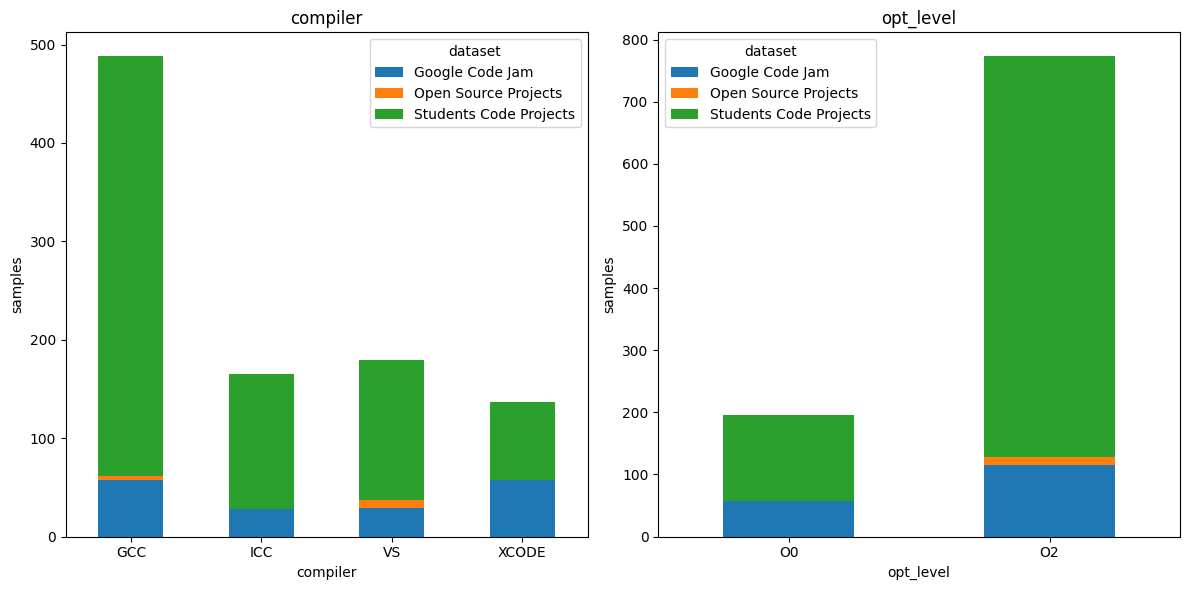

In [ ]:
fig = plt.figure(figsize=(12,6))

for i, col in enumerate(['compiler','opt_level']):
    fig.add_subplot(1, 2, i + 1)
    df_plot = df.groupby([col, 'dataset']).size().reset_index().pivot(columns='dataset', index=col, values=0)
    df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title=col, rot=0)
    plt.ylabel('samples')

fig.tight_layout()

# Data Cleaning

Checking missing values and duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
missing_values = df.isnull().sum()
missing_values

id              0
dataset         0
compiler        0
opt_level       0
disassembled    0
string          0
dtype: int64

# Feature Engineering

Spliting The Data

In [ ]:
X= pd.concat([df['disassembled'],df['string']], axis=1)
Y= pd.concat([df['dataset'],df['compiler'], df['opt_level']], axis=1)

print("x shape:{}\t y shape:{}".format(X.shape,Y.shape))

x shape:(969, 2)	 y shape:(969, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state= random_state)

Distribution of Opt. lvl in The Traing Data

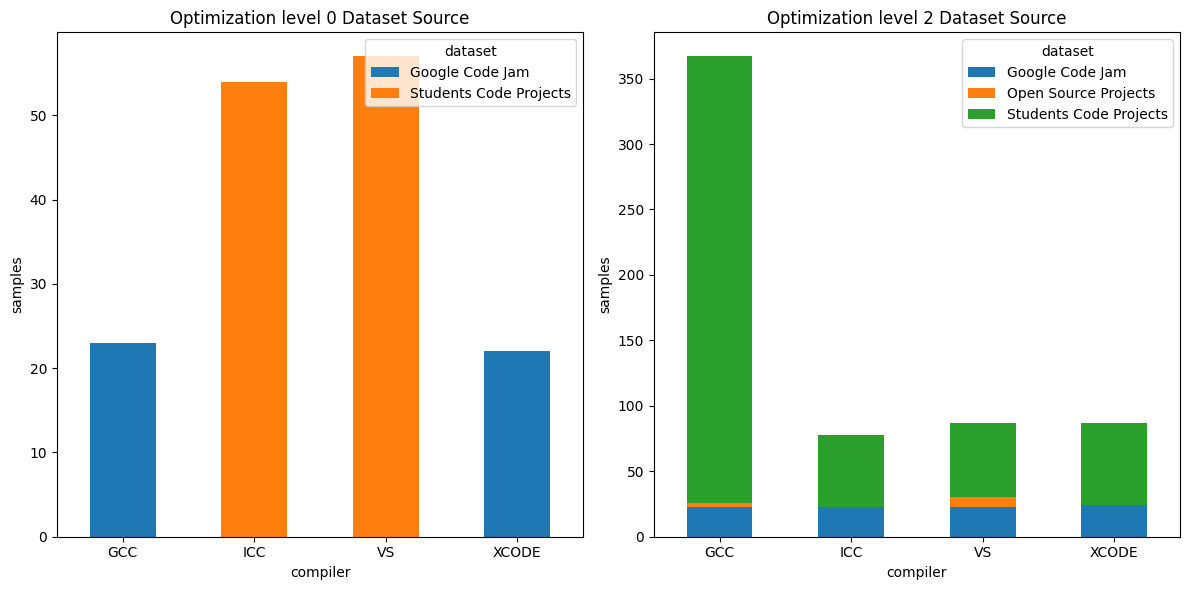

In [ ]:
fig = plt.figure(figsize=(12,6))

fig.add_subplot(1, 2, 1)
df_plot = y_train.loc[(df['opt_level'] == 'O0')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 0 Dataset Source', rot=0)
plt.ylabel('samples')

fig.add_subplot(1, 2, 2)
df_plot = y_train.loc[(df['opt_level'] == 'O2')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 2 Dataset Source', rot=0)
plt.ylabel('samples')

fig.tight_layout()

Distribution of Opt. lvl in The Test Data

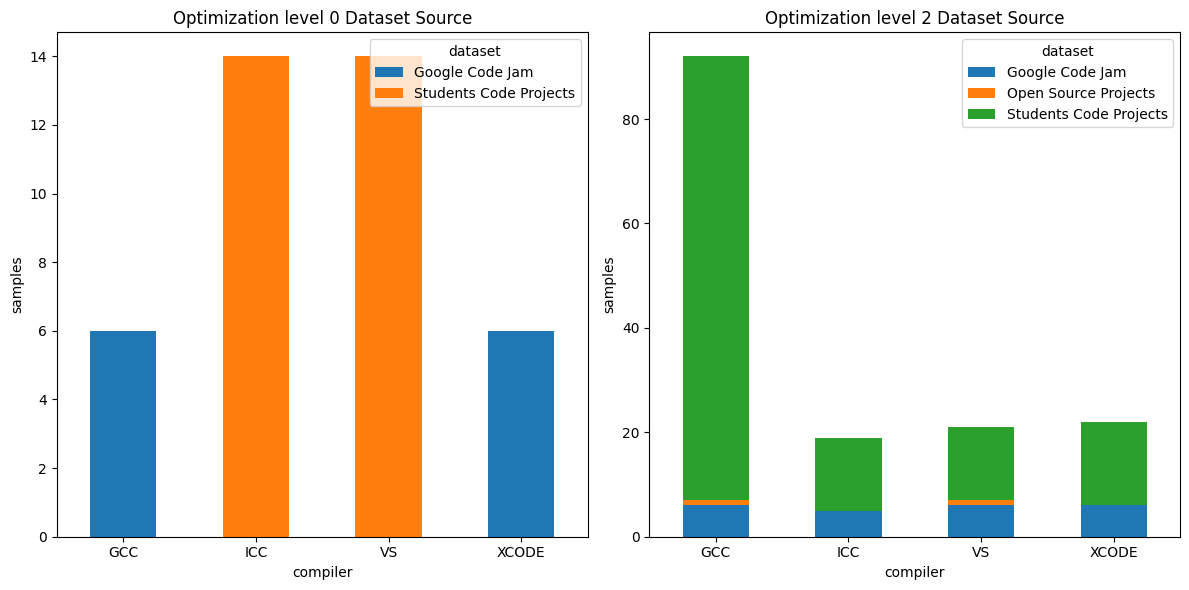

In [ ]:
fig = plt.figure(figsize=(12,6))

fig.add_subplot(1, 2, 1)
df_plot = y_test.loc[(df['opt_level'] == 'O0')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 0 Dataset Source', rot=0)
plt.ylabel('samples')

fig.add_subplot(1, 2, 2)
df_plot = y_test.loc[(df['opt_level'] == 'O2')].groupby(['compiler', 'dataset']).size().reset_index().pivot(columns='dataset', index='compiler', values=0)
df_plot.plot(kind='bar', stacked=True,ax=plt.gca(), title='Optimization level 2 Dataset Source', rot=0)
plt.ylabel('samples')

fig.tight_layout()

In [ ]:
# Create a LabelEncoder for 'compiler'
compiler_encoder = LabelEncoder()
y_train['compiler'] = compiler_encoder.fit_transform(y_train['compiler'])
y_test['compiler'] = compiler_encoder.transform(y_test['compiler'])

In [ ]:
list(compiler_encoder.classes_)

['GCC', 'ICC', 'VS', 'XCODE']

In [ ]:
# Create a LabelEncoder for 'opt_level'
opt_level_encoder = LabelEncoder()
y_train['opt_level'] = opt_level_encoder.fit_transform(y_train['opt_level'])
y_test['opt_level'] = opt_level_encoder.transform(y_test['opt_level'])

In [ ]:
list(opt_level_encoder.classes_)

['O0', 'O2']

### Transformation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def build_vectorizer(max_features, x_to_vect, vector_type):
    # max_features takes int of number of features to be returned, or takes None for max features
    if  vector_type== 'tfid':
      vectorizer = TfidfVectorizer(max_features=max_features).fit(x_to_vect)
    return vectorizer

In [ ]:
def transform_tfidf_vectors(tfidf_vectorizer, x_train_trans, x_test_trans=None):
    """
    Transforms input data using the specified TF-IDF vectorizer.

    Parameters:
    - tfidf_vectorizer: The TF-IDF vectorizer object (e.g., TfidfVectorizer).
    - x_train_trans: Training data to be transformed.
    - x_test_trans: (Optional) Test data to be transformed.

    Returns:
    - Transformed data (X_train_vector and X_test_vector if x_test_trans is provided, otherwise only X_train_vector).
    """
    vector_train = tfidf_vectorizer.transform(x_train_trans).toarray()
    features = tfidf_vectorizer.get_feature_names_out()

    X_train_vector = pd.DataFrame(vector_train, columns=features)

    if x_test_trans is not None:
        vector_test = tfidf_vectorizer.transform(x_test_trans).toarray()
        X_test_vector = pd.DataFrame(vector_test, columns=features)
        return X_train_vector, X_test_vector

    return X_train_vector

In [ ]:
def k_features_filter(k,x_train,y_train,features,selector=None):
  # Takes k, X_train, and Y_train
  # Returns the best k features names for Chi2, and Anova

  ## Chi2
  new_features_chi2=SelectKBest(chi2, k=k).fit(x_train,y_train).get_feature_names_out(features)

  ## Anova
  new_features_anova=SelectKBest(f_classif, k=k).fit(x_train,y_train).get_feature_names_out(features)

  if selector=='chi2':
    return new_features_chi2
  elif selector=='anova':
    return new_features_anova

  return new_features_chi2, new_features_anova

In [ ]:
def best_features_extraction(X_train_init, y_train_init, vector_type, k_int=4):

  kfold = KFold(n_splits=5)
  k_score_best = []
  selectors_best = []
  max_features_list=[]
  k_list=[]
  anova_scores=[]
  chi2_scores=[]

  for max_features in [50, 500, 2000, 20000]:
    print(f'Fitting at Num. of max_features = {max_features}' )
    vectorizer = build_vectorizer(max_features,X_train_init,vector_type= vector_type )
    X_train_vector= transform_tfidf_vectors(vectorizer, X_train_init)
    features_names= X_train_vector.columns.values.tolist()
    X_train_vector.index=y_train_init.index

    # Loop on k features range
    for k in range(k_int,15,2):

      chi2_fold_accuracies=[]
      anova_fold_accuracies=[]

      # Tuning the best features number applying cross validation
      for train_indicies, val_indicies in kfold.split(X_train_vector):
        # Splitting the train data to folds of train and validation
        train_indicies	= X_train_vector.index.values[train_indicies]
        val_indicies		= X_train_vector.index.values[val_indicies]

        X_train_fold, X_val_fold = X_train_vector.loc[train_indicies,:], X_train_vector.loc[val_indicies,:]
        Y_train_fold, Y_val_fold = y_train_init.loc[train_indicies], y_train_init.loc[val_indicies]

        # Getting the best k features for this fold
        new_features_chi2, new_features_anova= k_features_filter(k,X_train_fold, Y_train_fold, features_names)
        # Appling the train fold to train the model
        clf_chi2  =   DecisionTreeClassifier(random_state=random_state).fit(X_train_fold[new_features_chi2],Y_train_fold)
        clf_anova  =   DecisionTreeClassifier(random_state=random_state).fit(X_train_fold[new_features_anova],Y_train_fold)

        # Calculating the accuracy_score for this fold
        y_chi2    =   clf_chi2.predict(X_val_fold[new_features_chi2])
        y_anova    =   clf_anova.predict(X_val_fold[new_features_anova])
        score_chi2=   accuracy_score(Y_val_fold,y_chi2)
        score_anova=   accuracy_score(Y_val_fold,y_anova)

        chi2_fold_accuracies.append(score_chi2)
        anova_fold_accuracies.append(score_anova)
      # Getting the mean accuracy for the 5 folds at each k
      score_chi2 =  mean(chi2_fold_accuracies)
      score_anova = mean(anova_fold_accuracies)
      anova_scores.append(score_anova)
      chi2_scores.append(score_chi2)

      scores=np.array([score_anova,score_chi2])
      selectors=['anova','chi2']

      k_list.append(k)
      max_features_list.append(max_features)

      # print(f'At Num. of max_features = {max_features}, k = {k}, best feature selector is {selectors[np.argmax(scores)]}, accuracy_score = {scores[np.argmax(scores)]*100}%' )

  feature_selection_evaluation= pd.DataFrame({'max_features':max_features_list, 'k': k_list, 'Anova': anova_scores,'Chi2': chi2_scores})
  return feature_selection_evaluation

In [ ]:
def best_features_params(df):
  highest_anova=df.iloc[df['Anova'].argmax(axis=0)]['Anova']
  highest_chi2=df.iloc[df['Chi2'].argmax(axis=0)]['Chi2']
  best_selector= 'Anova' if (highest_anova >highest_chi2) else 'Chi2'
  highest_score= highest_anova if (highest_anova >highest_chi2) else highest_chi2

  k= df.iloc[df[best_selector].argmax(axis=0)]['k']
  max_features= df.iloc[df[best_selector].argmax(axis=0)]['max_features']

  return max_features,k, best_selector, highest_score

In [ ]:
FS_eval_strings_compiler= best_features_extraction(X_train['string'], y_train['compiler'], vector_type='tfid')
FS_eval_strings_opt_level= best_features_extraction(X_train['string'], y_train['opt_level'],k_int=2, vector_type='tfid')
FS_eval_disassem_compiler= best_features_extraction(X_train['disassembled'], y_train['compiler'], vector_type='tfid')
FS_eval_disassem_opt_level= best_features_extraction(X_train['disassembled'], y_train['opt_level'],k_int=2, vector_type='tfid')

Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000
Fitting at Num. of max_features = 50
Fitting at Num. of max_features = 500
Fitting at Num. of max_features = 2000
Fitting at Num. of max_features = 20000


In [ ]:
print('Best max_features, k, feature selector, and accuracy for strings-compiler:',best_features_params(FS_eval_strings_compiler))
print('Best max_features, k, feature selector, and accuracy for strings-opt level:',best_features_params(FS_eval_strings_opt_level))
print('Best max_features, k, feature selector, and accuracy for disassembled-compiler:',best_features_params(FS_eval_disassem_compiler))
print('Best max_features, k, feature selector, and accuracy for disassembled-opt level:',best_features_params(FS_eval_disassem_opt_level))

Best max_features, k, feature selector, and accuracy for strings-compiler: (500.0, 12.0, 'Anova', 0.9948387096774194)
Best max_features, k, feature selector, and accuracy for strings-opt level: (20000.0, 2.0, 'Anova', 0.8258064516129032)
Best max_features, k, feature selector, and accuracy for disassembled-compiler: (2000.0, 8.0, 'Anova', 0.9935483870967742)
Best max_features, k, feature selector, and accuracy for disassembled-opt level: (500.0, 4.0, 'Anova', 0.8025806451612904)


<Axes: xlabel='problems', ylabel='accuracies'>

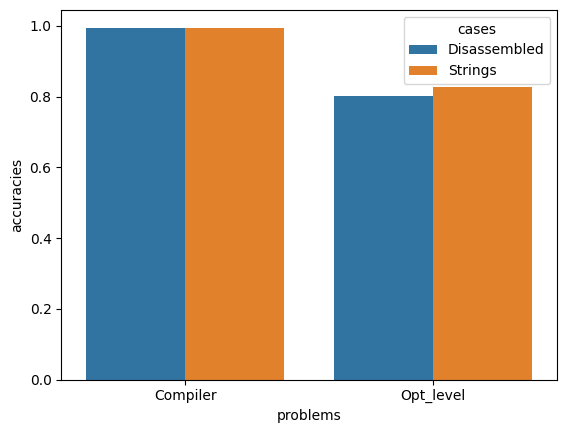

In [ ]:
cases=['Disassembled', 'Disassembled', 'Strings',  'Strings' ]
problems= ['Compiler','Opt_level','Compiler','Opt_level']
accuracies=[best_features_params(FS_eval_disassem_compiler)[3], best_features_params(FS_eval_disassem_opt_level)[3],
            best_features_params(FS_eval_strings_compiler)[3], best_features_params(FS_eval_strings_opt_level)[3] ]

plt_df= pd.DataFrame({'cases': cases, 'problems':problems,'accuracies': accuracies })
sns.barplot(data=plt_df, x='problems', y='accuracies', hue='cases')

Strings with Complier Vs. Optimization level

Strings with compiler classification problem


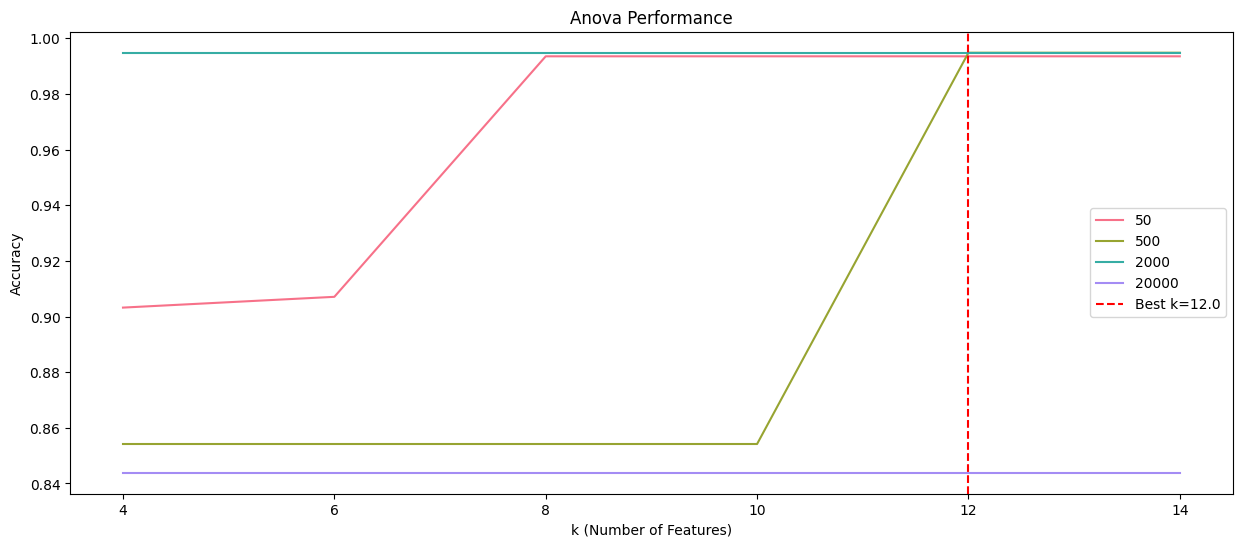

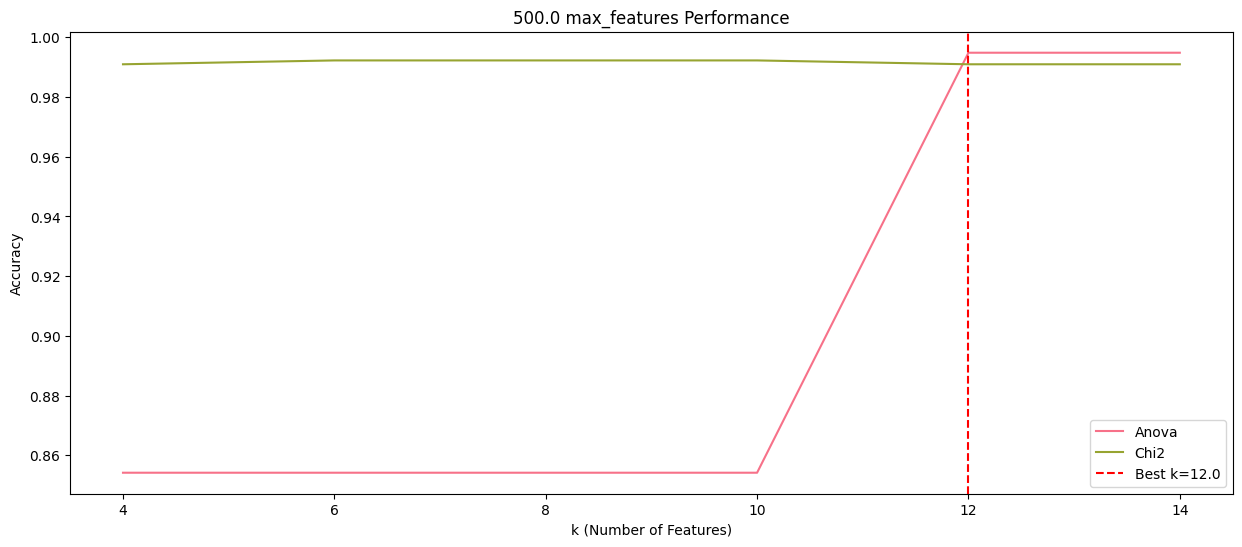

In [ ]:
print('Strings with compiler classification problem')
eval = FS_eval_strings_compiler

eval['max_features'] = eval['max_features'].fillna('None')

# Extract best configuration
best_max_features, best_k, best_selector, _ = best_features_params(FS_eval_strings_compiler)

# Define a custom color palette with different colors for each max_features label
max_features_palette = sns.color_palette("husl", n_colors=len(eval['max_features'].unique()))

# Plot Performance vs. k for different max_features
plt.figure(figsize=(15, 6))
plt.title(f'{best_selector} Performance')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt_df = eval
sns.lineplot(data=plt_df, x='k', y=best_selector, hue='max_features', palette=max_features_palette)

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

# Define a custom color palette with different colors for each selector label
selector_palette = sns.color_palette("husl", n_colors=len(eval['max_features'].unique()))

# Plot Performance vs. selectors for the best max_features
plt.figure(figsize=(15, 6))
plt.title(f'{best_max_features} max_features Performance')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt_df = eval.loc[(eval['max_features'] == best_max_features)].melt(id_vars=['k', 'max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=selector_palette)

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

Strings with optimization level classification problem


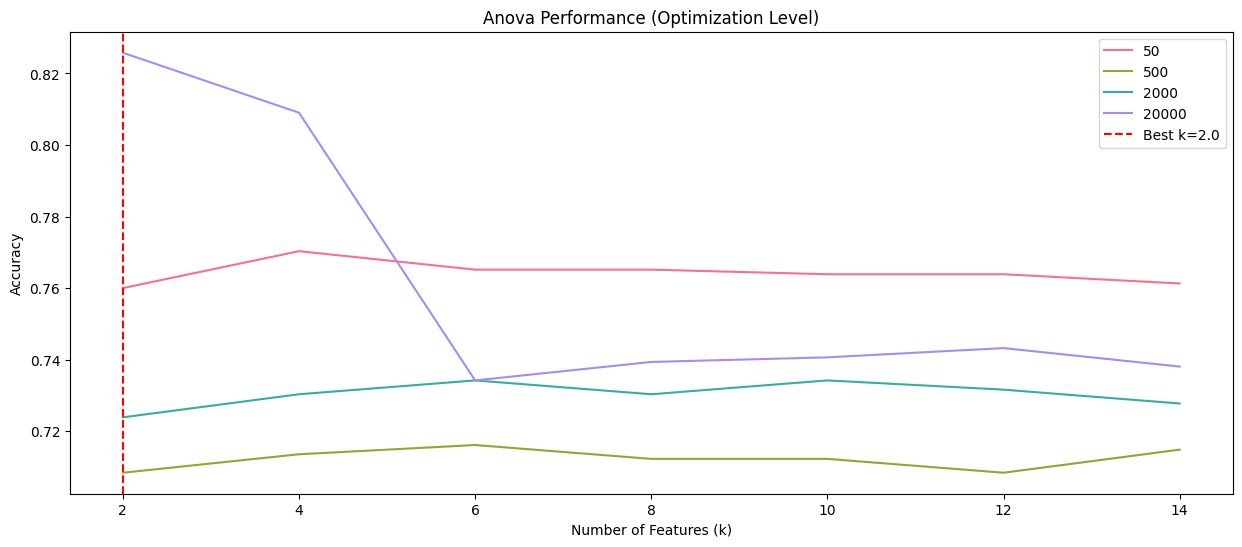

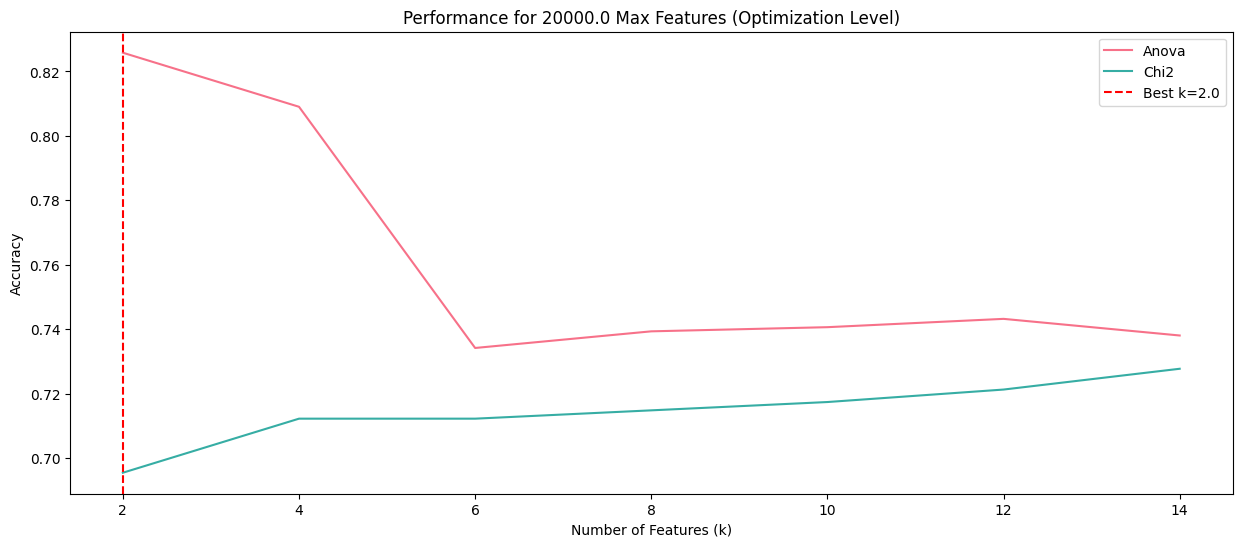

In [ ]:
print('Strings with optimization level classification problem')
eval_strings_opt_level = FS_eval_strings_opt_level

# Fill missing values in the 'max_features' column with 'None'
eval_strings_opt_level['max_features'] = eval_strings_opt_level['max_features'].fillna('None')

# Plot for k values
best_max_features, best_k, best_selector, _ = best_features_params(FS_eval_strings_opt_level)
palette = sns.color_palette("husl", 4)

plt.figure(figsize=(15, 6))
plt.title(f'{best_selector} Performance (Optimization Level)')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')

# Line plot for different max_features
sns.lineplot(data=eval_strings_opt_level, x='k', y=best_selector, hue='max_features', palette=palette)
plt.legend(title='Max Features')

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

# Plot for max_features values
palette = sns.color_palette("husl", 2)

plt.figure(figsize=(15, 6))
plt.title(f'Performance for {best_max_features} Max Features (Optimization Level)')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')

# Line plot for different selectors (e.g., Anova and Chi2)
plt_df = eval_strings_opt_level.loc[(eval_strings_opt_level['max_features'] == best_max_features)].melt(
    id_vars=['k', 'max_features'], var_name='selector', value_name='scores')

sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=palette)
plt.legend(title='Feature Selector')

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()


Disassembled with Complier Vs. Optimization level

Disassemble with compiler classification problem


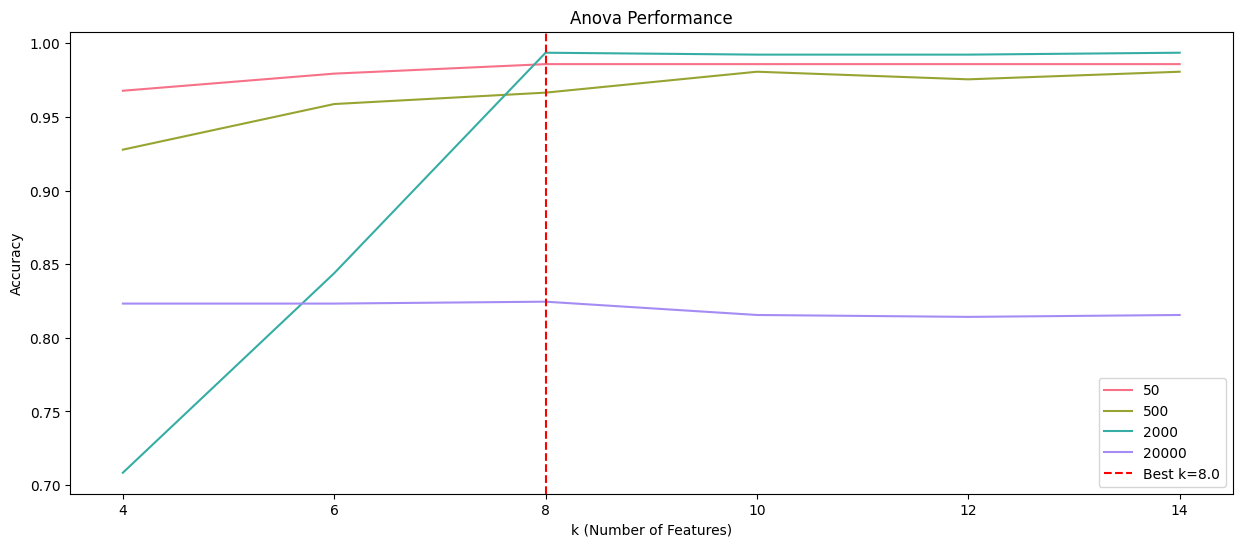

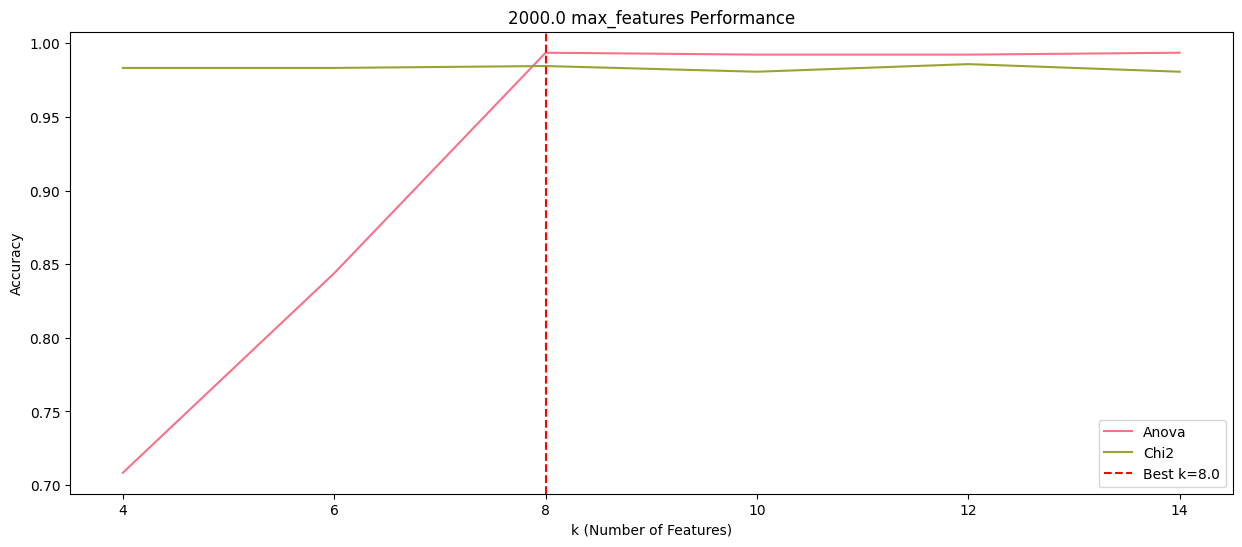

In [ ]:
print('Disassemble with compiler classification problem')
eval = FS_eval_disassem_compiler

# Fill missing values in the 'max_features' column with 'None'
eval['max_features'] = eval['max_features'].fillna('None')

# Extract best configuration
best_max_features, best_k, best_selector, _ = best_features_params(FS_eval_disassem_compiler)

# Define a custom color palette with different colors for each max_features label
max_features_palette = sns.color_palette("husl", n_colors=len(eval['max_features'].unique()))

# Plot Performance vs. k for different max_features
plt.figure(figsize=(15, 6))
plt.title(f'{best_selector} Performance')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt_df = eval
sns.lineplot(data=plt_df, x='k', y=best_selector, hue='max_features', palette=max_features_palette)

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

# Define a custom color palette with different colors for each selector label
selector_palette = sns.color_palette("husl", n_colors=len(eval['max_features'].unique()))

# Plot Performance vs. selectors for the best max_features
plt.figure(figsize=(15, 6))
plt.title(f'{best_max_features} max_features Performance')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt_df = eval.loc[(eval['max_features'] == best_max_features)].melt(id_vars=['k', 'max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=selector_palette)

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

Disassemble with optimization level classification problem


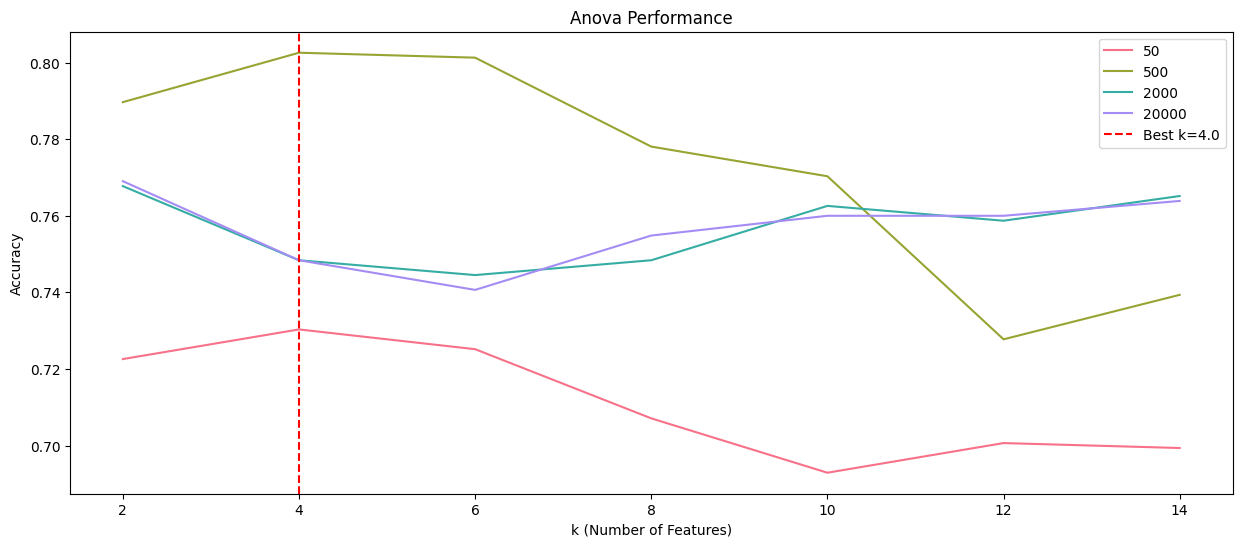

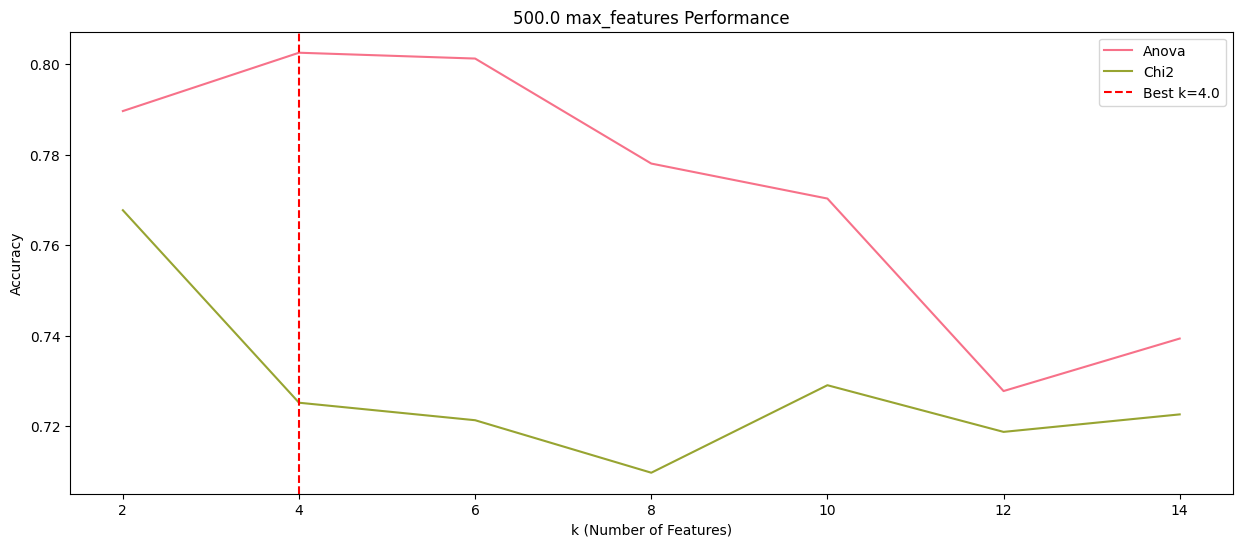

In [ ]:
print('Disassemble with optimization level classification problem')
eval = FS_eval_disassem_opt_level

# Fill missing values in the 'max_features' column with 'None'
eval['max_features'] = eval['max_features'].fillna('None')

# Extract best configuration
best_max_features, best_k, best_selector, _ = best_features_params(FS_eval_disassem_opt_level)

# Define a custom color palette with different colors for each max_features label
max_features_palette = sns.color_palette("husl", n_colors=len(eval['max_features'].unique()))

# Plot Performance vs. k for different max_features
plt.figure(figsize=(15, 6))
plt.title(f'{best_selector} Performance')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt_df = eval
sns.lineplot(data=plt_df, x='k', y=best_selector, hue='max_features', palette=max_features_palette)

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

# Define a custom color palette with different colors for each selector label
selector_palette = sns.color_palette("husl", n_colors=len(eval['max_features'].unique()))

# Plot Performance vs. selectors for the best max_features
plt.figure(figsize=(15, 6))
plt.title(f'{best_max_features} max_features Performance')
plt.xlabel('k (Number of Features)')
plt.ylabel('Accuracy')
plt_df = eval.loc[(eval['max_features'] == best_max_features)].melt(id_vars=['k', 'max_features'], var_name='selector', value_name='scores')
sns.lineplot(data=plt_df, x='k', y='scores', hue='selector', palette=selector_palette)

# Highlight the best configuration
plt.axvline(x=best_k, linestyle='--', color='r', label=f'Best k={best_k}')
plt.legend()
plt.show()

# Models

Disassembled - Compilers

In [ ]:
def build_and_evaluate_classifier(X_train, X_test, y_train, y_test, vectorizer_max_features, selector_k_features):
    # Build vectorizer
    vectorizer = build_vectorizer(vectorizer_max_features, X_train, 'tfid')

    # Transform vectors
    X_train_vect, X_test_vect = transform_tfidf_vectors(vectorizer, X_train, x_test_trans=X_test)

    # Feature selection
    features_names = X_train_vect.columns.values.tolist()
    new_features = k_features_filter(selector_k_features, X_train_vect, y_train, features_names, selector='anova')

    # Select features
    X_train_compiler = X_train_vect[new_features]
    X_test_compiler = X_test_vect[new_features]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_compiler)
    X_test_scaled = scaler.transform(X_test_compiler)

    # Logistic Regression
    lr = LogisticRegression(random_state=random_state, max_iter=10000, class_weight='balanced')
    clf_lr = lr.fit(X_train_scaled, y_train)

    # SVM
    svm = SVC(random_state=random_state)
    clf_svm = svm.fit(X_train_scaled, y_train)

    # Random Forest
    rf = RandomForestClassifier(random_state=random_state)
    clf_rf = rf.fit(X_train_scaled, y_train)

    # Gradient Boosting
    gb = GradientBoostingClassifier(random_state=random_state)
    clf_gb = gb.fit(X_train_scaled, y_train)

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=random_state)
    clf_dt = dt.fit(X_train_scaled, y_train)

    # Evaluate
    classifiers = [clf_lr, clf_svm, clf_rf, clf_gb, clf_dt]
    classifier_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

    model_f1_scores = {}  # Create a dictionary to store F1 scores

    for clf, name in zip(classifiers, classifier_names):
        accuracy = clf.score(X_test_scaled, y_test)
        y_pred = clf.predict(X_test_scaled)
        f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1 score

        model_f1_scores[name] = f1  # Store F1 score in the dictionary

        print(f"{name} Accuracy:", accuracy)
        print(f"{name} F1 Score:", f1)

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()

        classification_report_str = classification_report(y_test, y_pred)
        print(f"{name} Confusion Matrix:\n", cm)
        print(f"{name} Classification Report:\n", classification_report_str)

    # Identify the best model based on F1 score
    best_model = max(model_f1_scores, key=model_f1_scores.get)
    print(f"The best model is: {best_model} with an F1 score of {model_f1_scores[best_model]:.2f}")

    # Sort classifier_names and F1 scores in descending order of F1 score
    sorted_classifier_names = sorted(classifier_names, key=lambda name: model_f1_scores[name], reverse=False)
    sorted_f1_scores = [model_f1_scores[name] for name in sorted_classifier_names]

    # Find the highest F1 score value
    highest_f1_score = max(sorted_f1_scores)

    colors = ['gold' if f1 == highest_f1_score else 'darkgreen' for f1 in sorted_f1_scores]

    # Plot F1 scores in descending order with the same color condition
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_classifier_names, sorted_f1_scores, color=colors)
    plt.xlabel('F1 Score')
    plt.title('Model F1 Scores (Descending Order)')
    plt.show()

In [ ]:
def build_and_evaluate_classifier_over(X_train, X_test, y_train, y_test, random_state=random_state):

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression
    lr = LogisticRegression(random_state=random_state, max_iter=10000, class_weight='balanced')
    clf_lr = lr.fit(X_train_scaled, y_train)

    # SVM
    svm = SVC(random_state=random_state)
    clf_svm = svm.fit(X_train_scaled, y_train)

    # Random Forest
    rf = RandomForestClassifier(random_state=random_state)
    clf_rf = rf.fit(X_train_scaled, y_train)

    # Gradient Boosting
    gb = GradientBoostingClassifier(random_state=random_state)
    clf_gb = gb.fit(X_train_scaled, y_train)

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=random_state)
    clf_dt = dt.fit(X_train_scaled, y_train)

    # Evaluate
    classifiers = [clf_lr, clf_svm, clf_rf, clf_gb, clf_dt]
    classifier_names = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

    model_f1_scores = {}  # Create a dictionary to store F1 scores

    for clf, name in zip(classifiers, classifier_names):
        accuracy = clf.score(X_test_scaled, y_test)
        y_pred = clf.predict(X_test_scaled)
        f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1 score

        model_f1_scores[name] = f1  # Store F1 score in the dictionary

        print(f"{name} Accuracy:", accuracy)
        print(f"{name} F1 Score:", f1)

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()

        classification_report_str = classification_report(y_test, y_pred)
        print(f"{name} Confusion Matrix:\n", cm)
        print(f"{name} Classification Report:\n", classification_report_str)

    # Identify the best model based on F1 score
    best_model = max(model_f1_scores, key=model_f1_scores.get)
    print(f"The best model is: {best_model} with an F1 score of {model_f1_scores[best_model]:.2f}")

    # Sort classifier_names and F1 scores in descending order of F1 score
    sorted_classifier_names = sorted(classifier_names, key=lambda name: model_f1_scores[name], reverse=False)
    sorted_f1_scores = [model_f1_scores[name] for name in sorted_classifier_names]

    # Find the highest F1 score value
    highest_f1_score = max(sorted_f1_scores)

    colors = ['gold' if f1 == highest_f1_score else 'darkgreen' for f1 in sorted_f1_scores]

    # Plot F1 scores in descending order with the same color condition
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_classifier_names, sorted_f1_scores, color=colors)
    plt.xlabel('F1 Score')
    plt.title('Model F1 Scores (Descending Order)')
    plt.show()

Logistic Regression Accuracy: 0.9948453608247423
Logistic Regression F1 Score: 0.9951968219573853


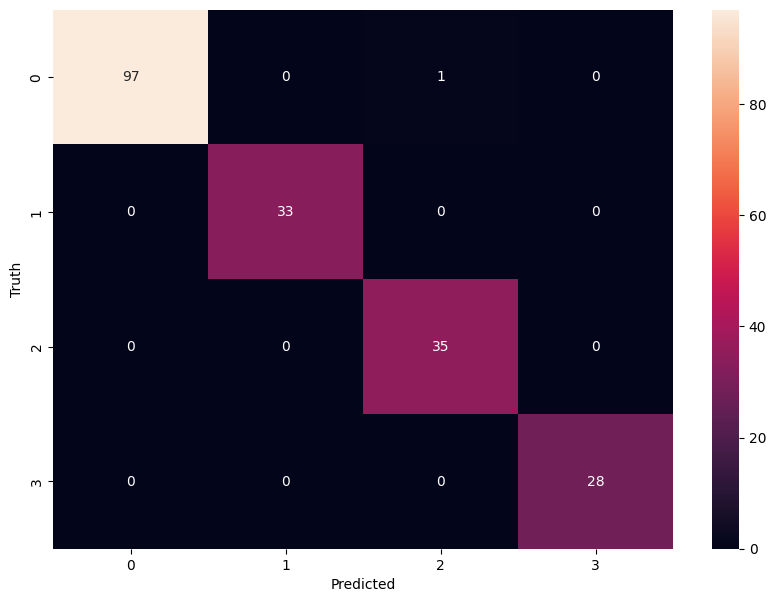

Logistic Regression Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

SVM Accuracy: 0.9948453608247423
SVM F1 Score: 0.9951968219573853


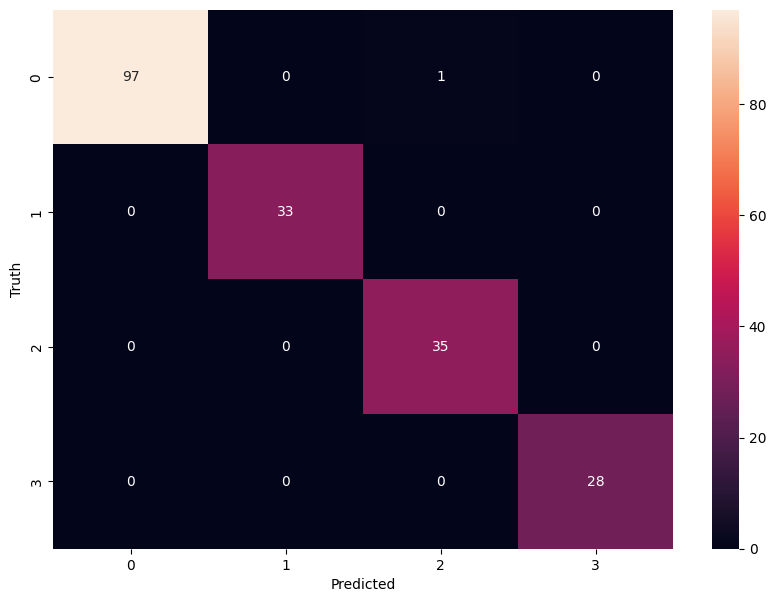

SVM Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

Random Forest Accuracy: 0.9948453608247423
Random Forest F1 Score: 0.9951077760612079


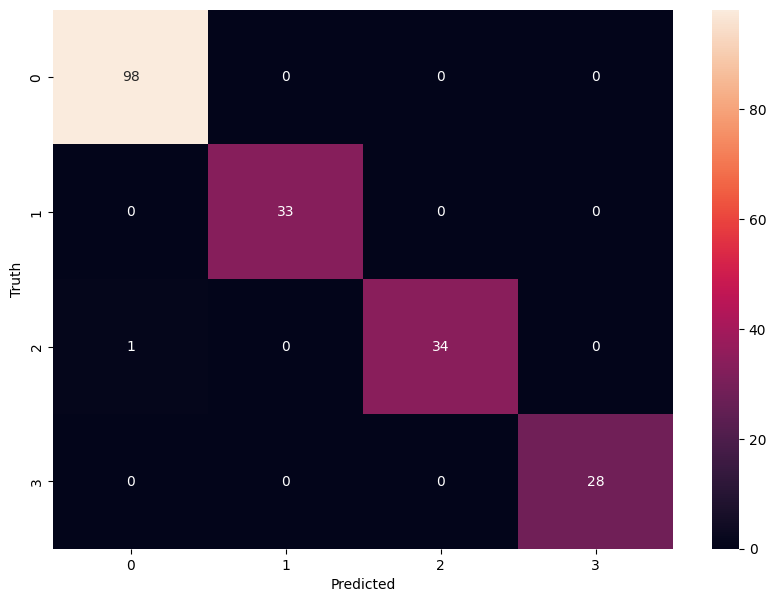

Random Forest Confusion Matrix:
 [[98  0  0  0]
 [ 0 33  0  0]
 [ 1  0 34  0]
 [ 0  0  0 28]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      1.00      1.00        33
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       1.00      0.99      1.00       194
weighted avg       0.99      0.99      0.99       194

Gradient Boosting Accuracy: 1.0
Gradient Boosting F1 Score: 1.0


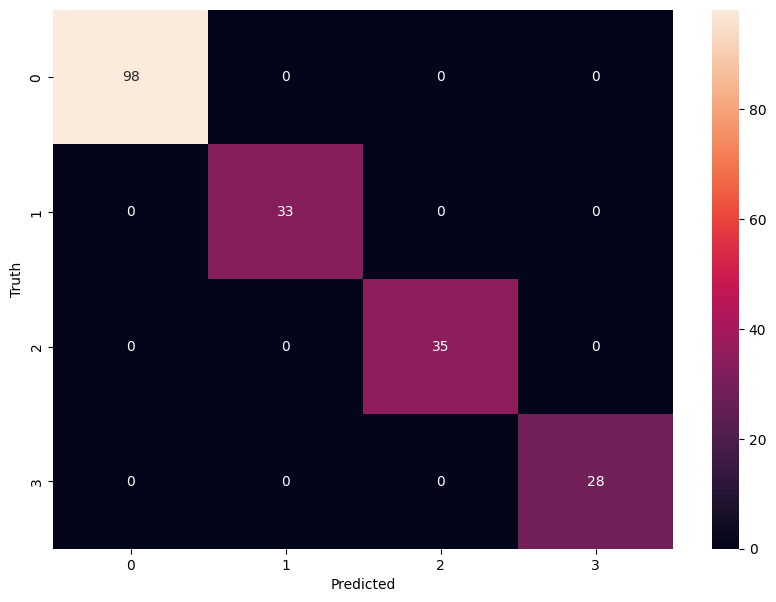

Gradient Boosting Confusion Matrix:
 [[98  0  0  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        28

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

Decision Tree Accuracy: 1.0
Decision Tree F1 Score: 1.0


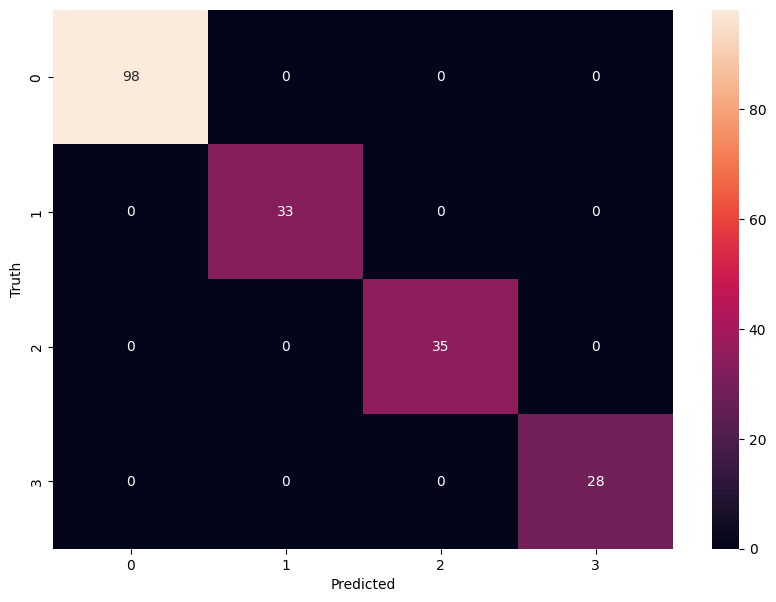

Decision Tree Confusion Matrix:
 [[98  0  0  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        28

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

The best model is: Gradient Boosting with an F1 score of 1.00


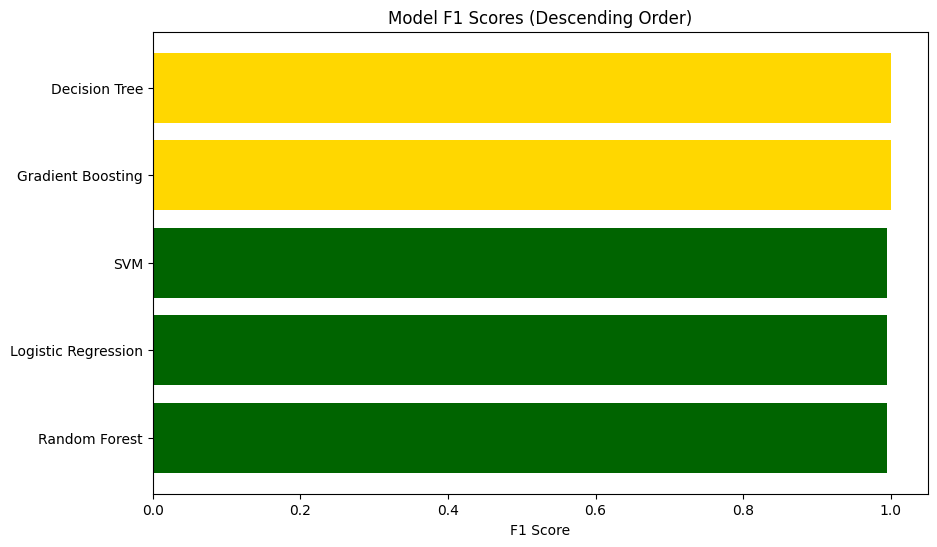

In [ ]:
# Build and evaluate classifier for disassembled code
clf_disassem_compiler = build_and_evaluate_classifier(X_train['disassembled'], X_test['disassembled'],
                                                      y_train['compiler'], y_test['compiler'],
                                                      vectorizer_max_features=2000, selector_k_features=8)


String - Compilers

Logistic Regression Accuracy: 0.9948453608247423
Logistic Regression F1 Score: 0.9951968219573853


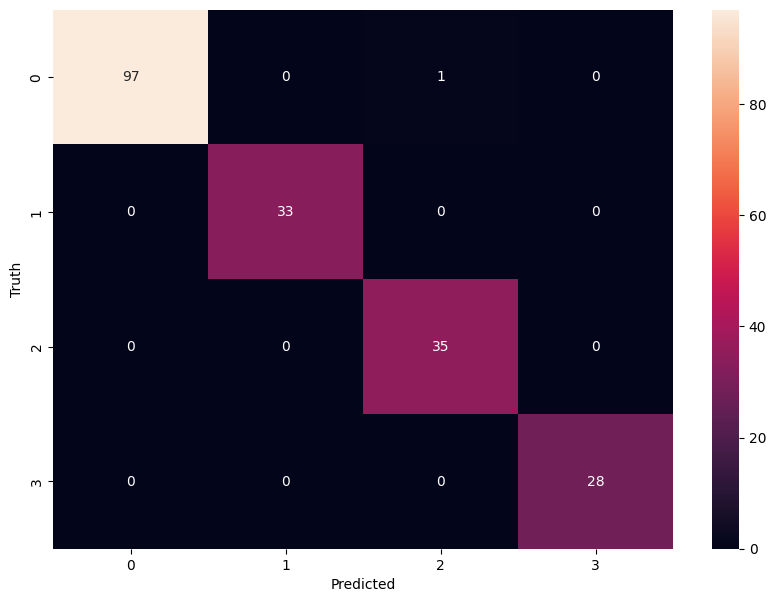

Logistic Regression Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

SVM Accuracy: 0.9948453608247423
SVM F1 Score: 0.9951968219573853


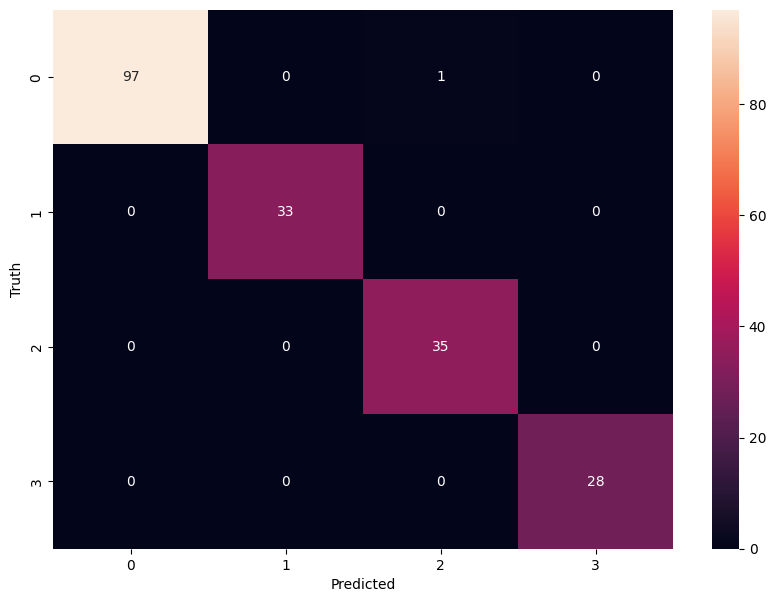

SVM Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

Random Forest Accuracy: 0.9948453608247423
Random Forest F1 Score: 0.9951968219573853


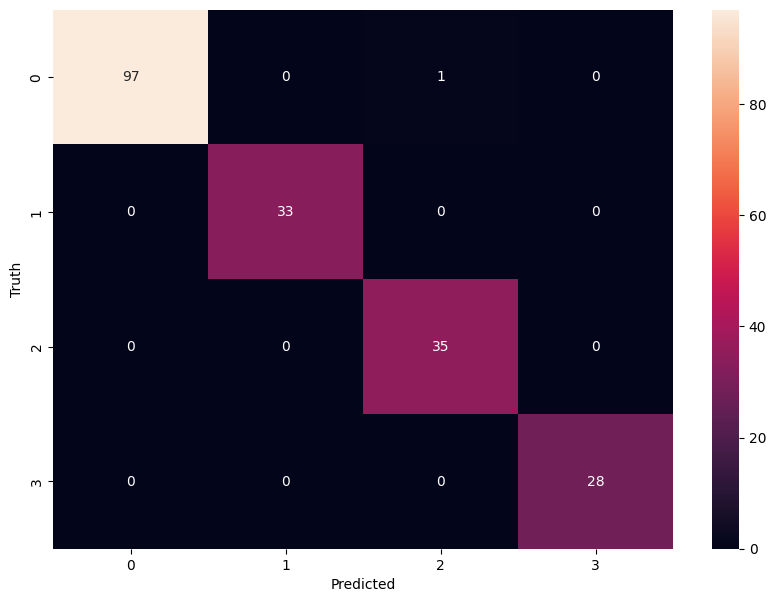

Random Forest Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

Gradient Boosting Accuracy: 0.9948453608247423
Gradient Boosting F1 Score: 0.9951968219573853


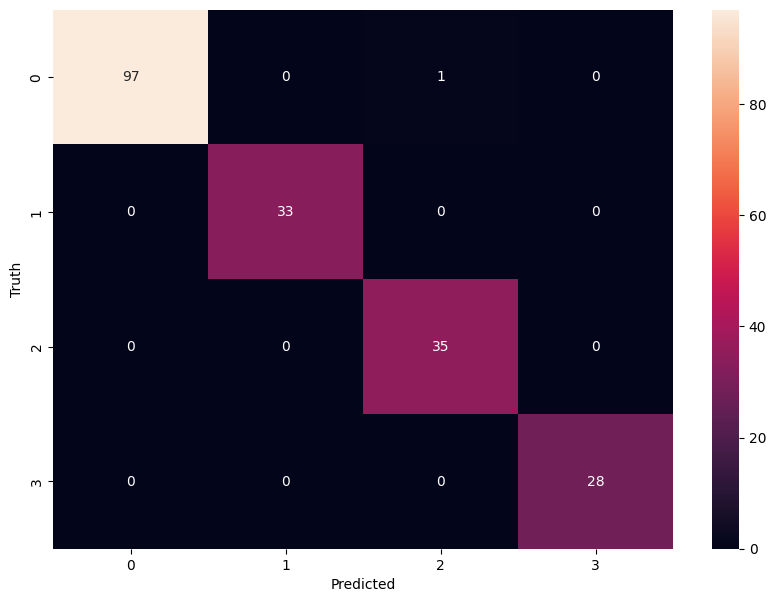

Gradient Boosting Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

Decision Tree Accuracy: 0.9948453608247423
Decision Tree F1 Score: 0.9951968219573853


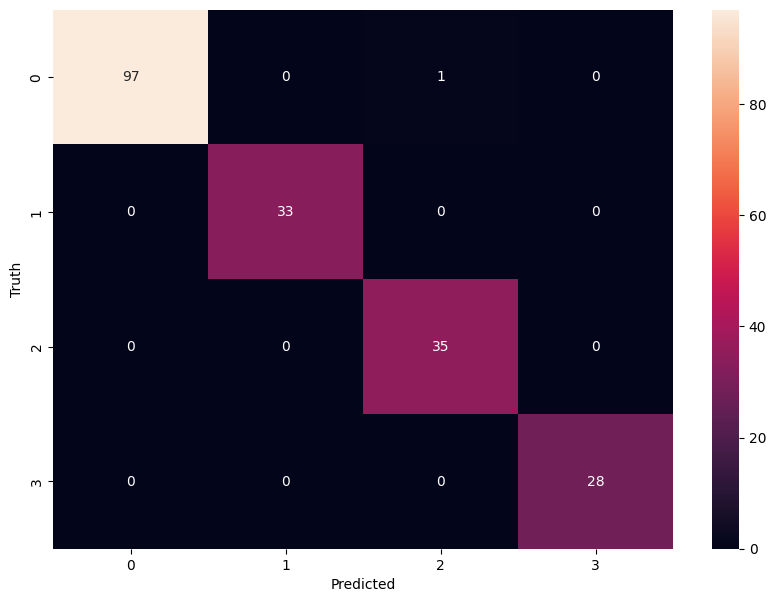

Decision Tree Confusion Matrix:
 [[97  0  1  0]
 [ 0 33  0  0]
 [ 0  0 35  0]
 [ 0  0  0 28]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       1.00      1.00      1.00        33
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        28

    accuracy                           0.99       194
   macro avg       0.99      1.00      1.00       194
weighted avg       0.99      0.99      0.99       194

The best model is: Logistic Regression with an F1 score of 1.00


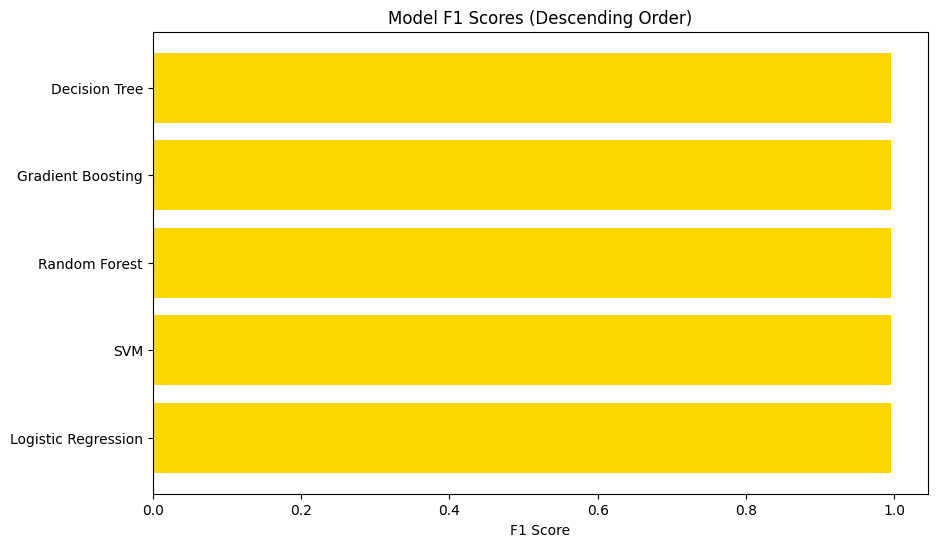

In [ ]:
# Build and evaluate classifier for string features
clf_string_compiler = build_and_evaluate_classifier(X_train['string'], X_test['string'],
                                                    y_train['compiler'], y_test['compiler'],
                                                    vectorizer_max_features=500, selector_k_features=12)

Disassembled - Opt LVL.

Logistic Regression Accuracy: 0.8350515463917526
Logistic Regression F1 Score: 0.6845528455284553


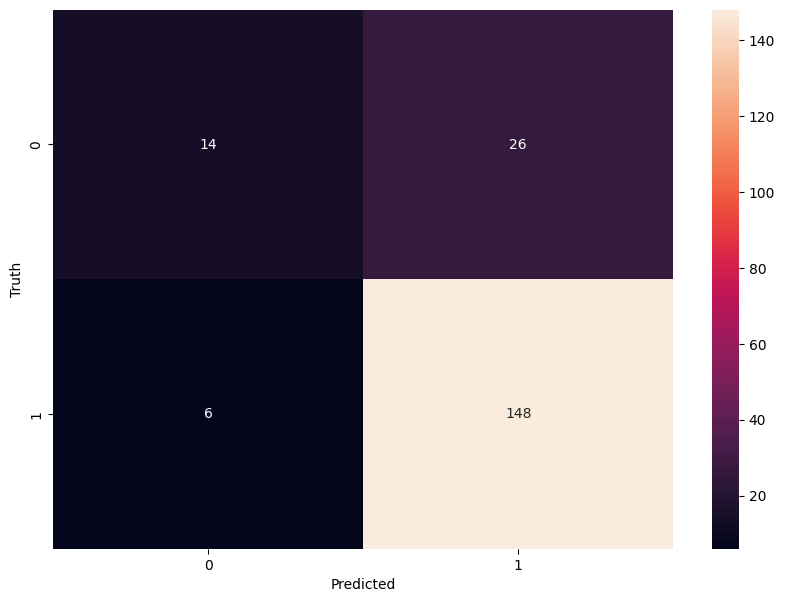

Logistic Regression Confusion Matrix:
 [[ 14  26]
 [  6 148]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.35      0.47        40
           1       0.85      0.96      0.90       154

    accuracy                           0.84       194
   macro avg       0.78      0.66      0.68       194
weighted avg       0.82      0.84      0.81       194

SVM Accuracy: 0.8556701030927835
SVM F1 Score: 0.6891025641025641


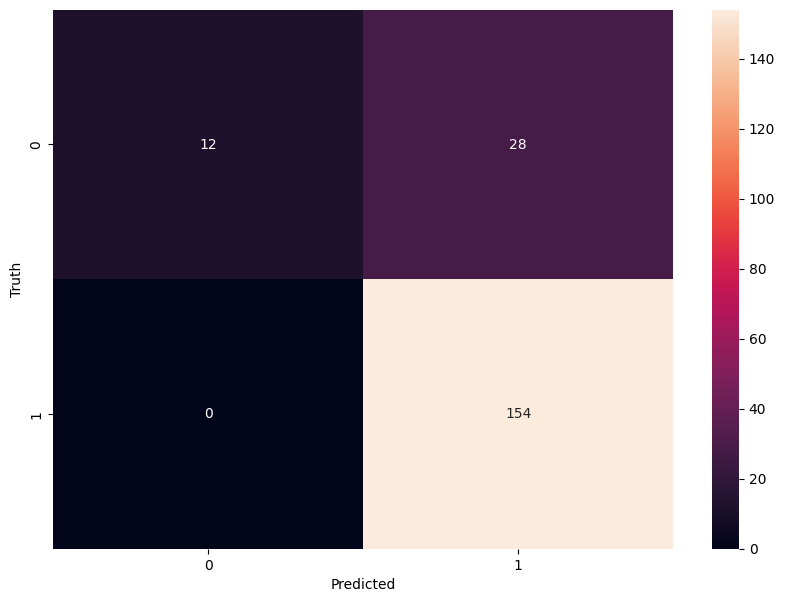

SVM Confusion Matrix:
 [[ 12  28]
 [  0 154]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46        40
           1       0.85      1.00      0.92       154

    accuracy                           0.86       194
   macro avg       0.92      0.65      0.69       194
weighted avg       0.88      0.86      0.82       194

Random Forest Accuracy: 0.8247422680412371
Random Forest F1 Score: 0.6736592123490995


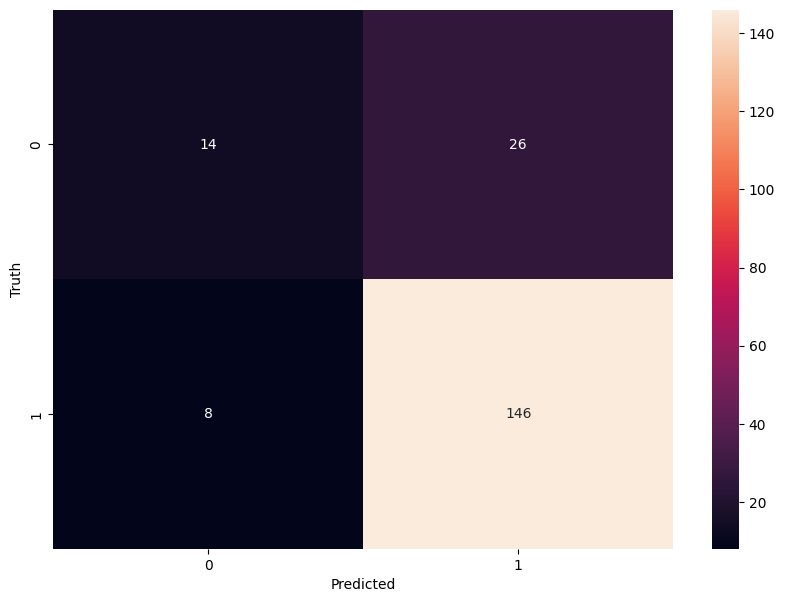

Random Forest Confusion Matrix:
 [[ 14  26]
 [  8 146]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.35      0.45        40
           1       0.85      0.95      0.90       154

    accuracy                           0.82       194
   macro avg       0.74      0.65      0.67       194
weighted avg       0.81      0.82      0.80       194

Gradient Boosting Accuracy: 0.8350515463917526
Gradient Boosting F1 Score: 0.6845528455284553


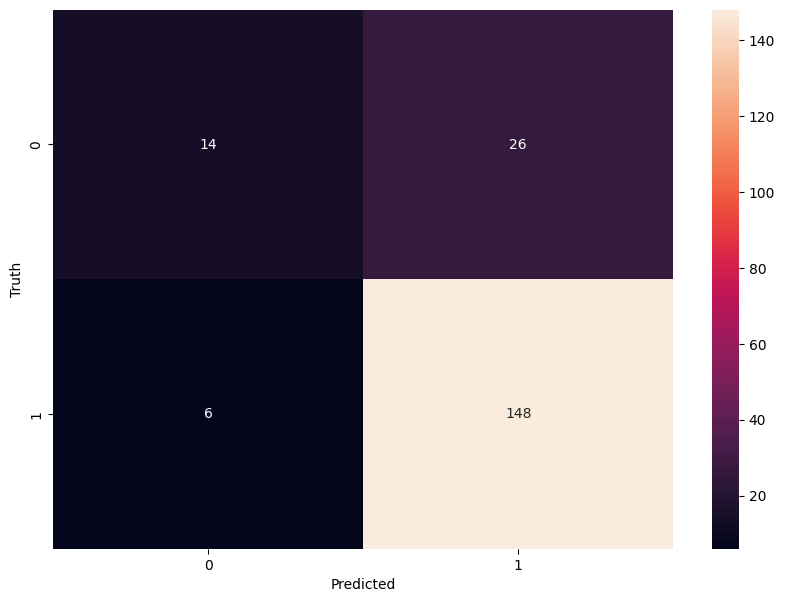

Gradient Boosting Confusion Matrix:
 [[ 14  26]
 [  6 148]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.35      0.47        40
           1       0.85      0.96      0.90       154

    accuracy                           0.84       194
   macro avg       0.78      0.66      0.68       194
weighted avg       0.82      0.84      0.81       194

Decision Tree Accuracy: 0.8041237113402062
Decision Tree F1 Score: 0.653115000941088


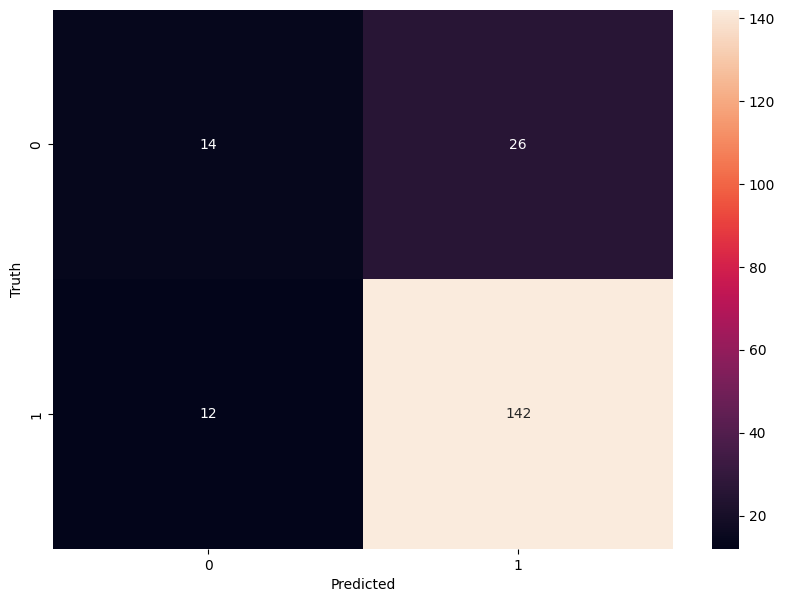

Decision Tree Confusion Matrix:
 [[ 14  26]
 [ 12 142]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.35      0.42        40
           1       0.85      0.92      0.88       154

    accuracy                           0.80       194
   macro avg       0.69      0.64      0.65       194
weighted avg       0.78      0.80      0.79       194

The best model is: SVM with an F1 score of 0.69


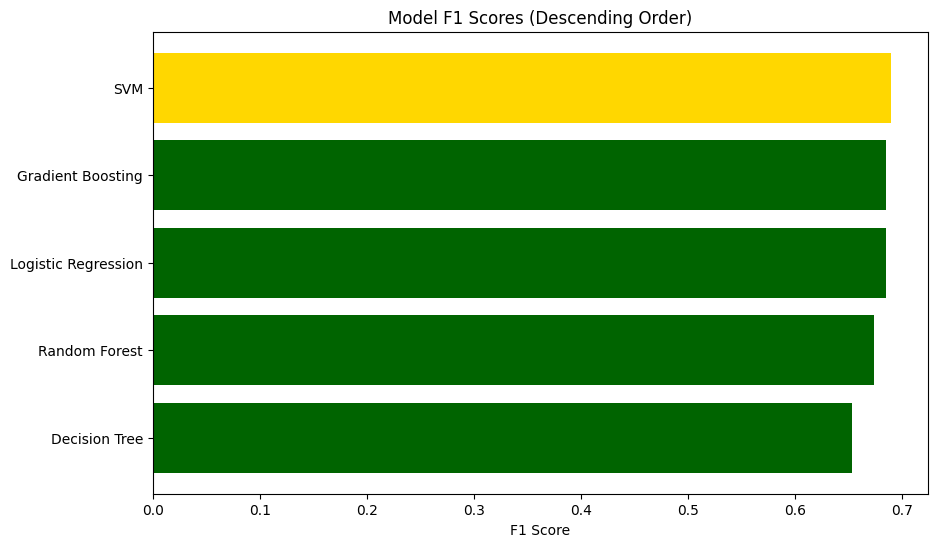

In [ ]:
# Build and evaluate classifier for disassembled code
build_and_evaluate_classifier(X_train['disassembled'], X_test['disassembled'],
                                                      y_train['opt_level'], y_test['opt_level'],
                                                      vectorizer_max_features=500, selector_k_features=4)

String - Opt LVL.

Logistic Regression Accuracy: 0.8402061855670103
Logistic Regression F1 Score: 0.6379507555234483


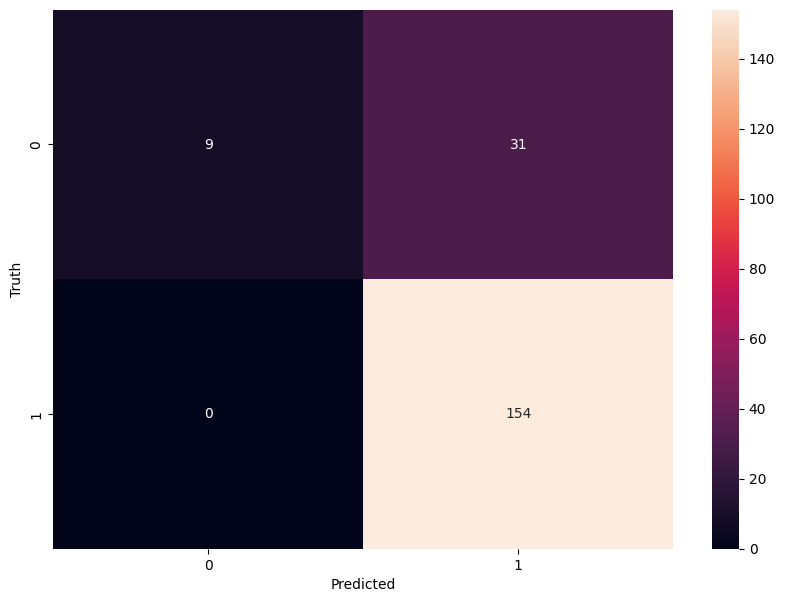

Logistic Regression Confusion Matrix:
 [[  9  31]
 [  0 154]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

SVM Accuracy: 0.8402061855670103
SVM F1 Score: 0.6379507555234483


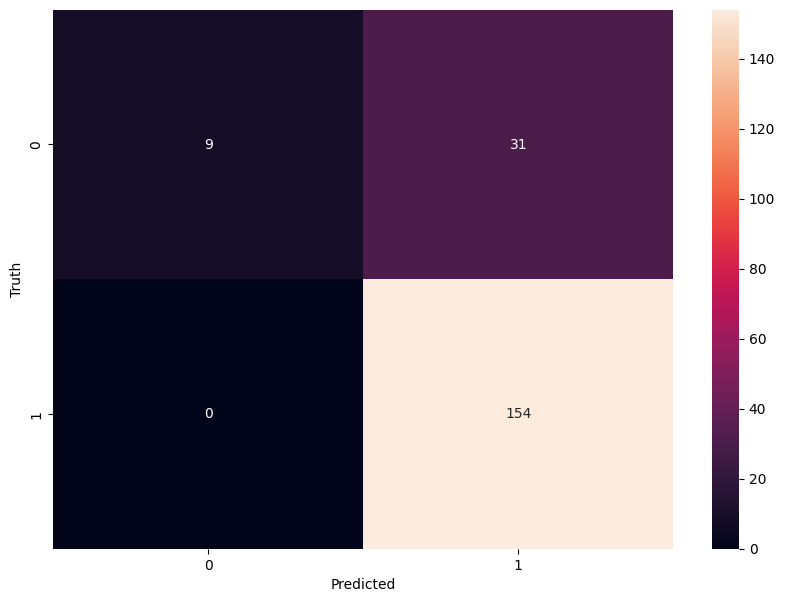

SVM Confusion Matrix:
 [[  9  31]
 [  0 154]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

Random Forest Accuracy: 0.8402061855670103
Random Forest F1 Score: 0.6379507555234483


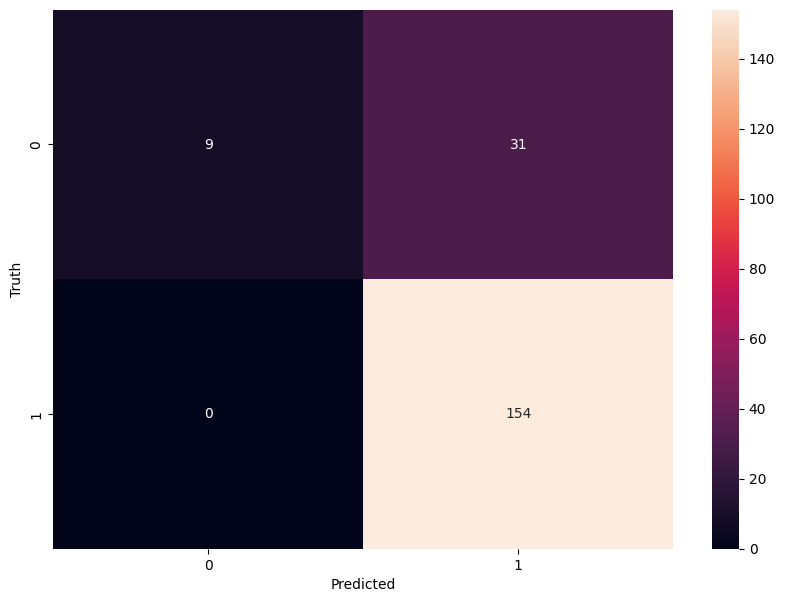

Random Forest Confusion Matrix:
 [[  9  31]
 [  0 154]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

Gradient Boosting Accuracy: 0.8402061855670103
Gradient Boosting F1 Score: 0.6379507555234483


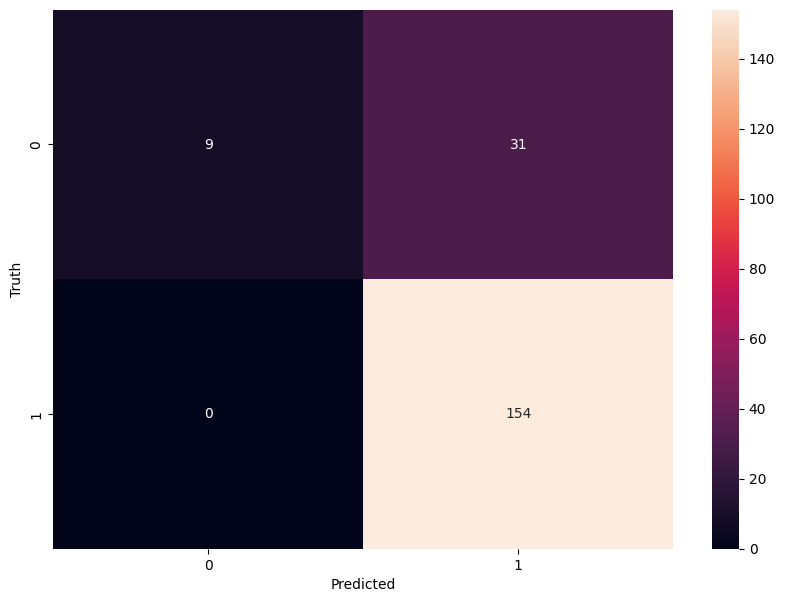

Gradient Boosting Confusion Matrix:
 [[  9  31]
 [  0 154]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

Decision Tree Accuracy: 0.8402061855670103
Decision Tree F1 Score: 0.6379507555234483


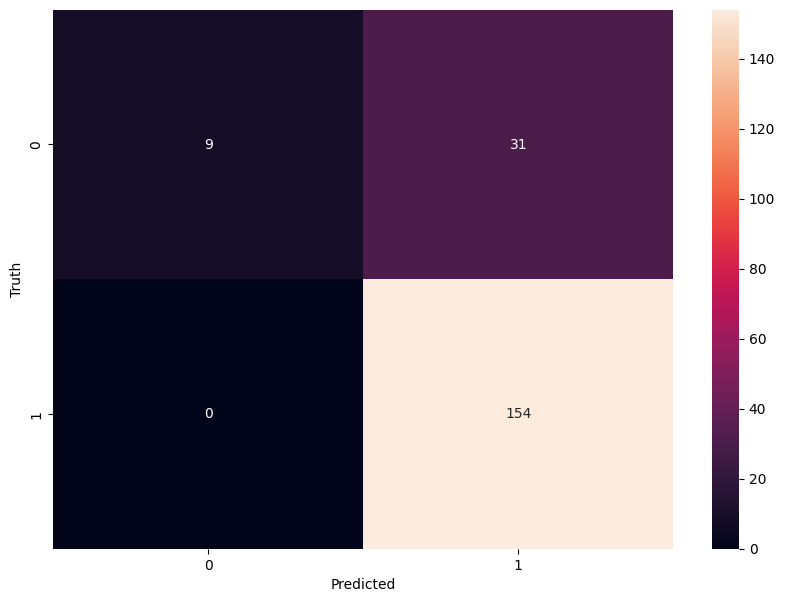

Decision Tree Confusion Matrix:
 [[  9  31]
 [  0 154]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

The best model is: Logistic Regression with an F1 score of 0.64


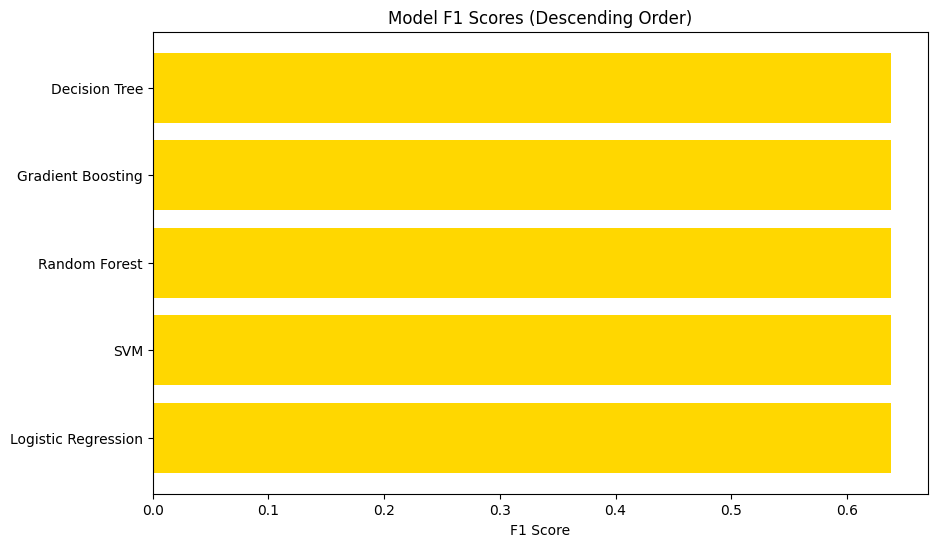

In [ ]:
# Build and evaluate classifier for string features
build_and_evaluate_classifier(X_train['string'], X_test['string'],
                                                    y_train['opt_level'], y_test['opt_level'],
                                                    vectorizer_max_features=20000, selector_k_features=2)

Doing SMOTE Sampling To the optimization Level one time with dissassmpled and one with string

In [ ]:
# Check the class distribution before SMOTE
print("Class distribution before SMOTE:\n", y_train['opt_level'].value_counts())

Class distribution before SMOTE:
 1    619
0    156
Name: opt_level, dtype: int64


In [ ]:
vectorizer = build_vectorizer(500,X_train['disassembled'],'tfid')
X_train_disassem, X_test_disassem= transform_tfidf_vectors(vectorizer, X_train['disassembled'], x_test_trans=X_test['disassembled'])
features_names= X_train_disassem.columns.values.tolist()
new_features= k_features_filter( 4, X_train_disassem,y_train['opt_level'], features_names,  selector='anova')
X_train_disassem_opt= X_train_disassem[new_features]
X_test_disassem_opt= X_test_disassem[new_features]

In [ ]:
vectorizer = build_vectorizer(20000,X_train['string'],'tfid')
X_train_strings, X_test_strings = transform_tfidf_vectors(vectorizer, X_train['string'], x_test_trans=X_test['string'])
features_names= X_train_strings.columns.values.tolist()
new_features= k_features_filter( 2, X_train_strings,y_train['opt_level'], features_names,  selector='anova')
X_train_strings_opt= X_train_strings[new_features]
X_test_strings_opt= X_test_strings[new_features]

In [ ]:
smote = SMOTE(random_state=random_state)
X_train_disassem_opt_resampled, y_train_disassem_opt_resampled = smote.fit_resample(X_train_disassem_opt, y_train['opt_level'])

In [ ]:
smote = SMOTE(random_state=random_state)
X_train_string_opt_resampled, y_train_string_opt_resampled = smote.fit_resample(X_train_strings_opt, y_train['opt_level'])

In [ ]:
# Check the class distribution before SMOTE
print("Class distribution before SMOTE:\n", y_train_disassem_opt_resampled.value_counts())

Class distribution before SMOTE:
 1    619
0    619
Name: opt_level, dtype: int64


In [ ]:
# Check the class distribution before SMOTE
print("Class distribution before SMOTE:\n", y_train_string_opt_resampled.value_counts())

Class distribution before SMOTE:
 1    619
0    619
Name: opt_level, dtype: int64


Logistic Regression Accuracy: 0.8350515463917526
Logistic Regression F1 Score: 0.6845528455284553


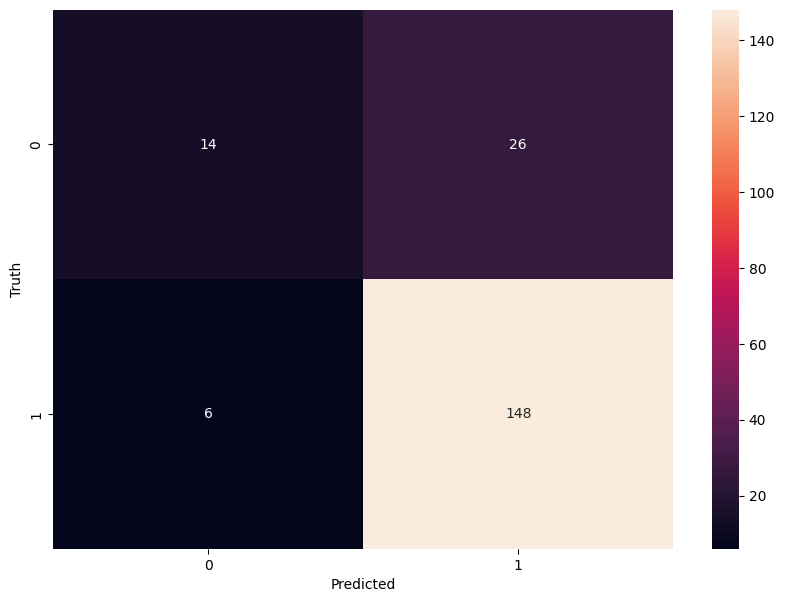

Logistic Regression Confusion Matrix:
 [[ 14  26]
 [  6 148]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.35      0.47        40
           1       0.85      0.96      0.90       154

    accuracy                           0.84       194
   macro avg       0.78      0.66      0.68       194
weighted avg       0.82      0.84      0.81       194

SVM Accuracy: 0.845360824742268
SVM F1 Score: 0.6959247648902821


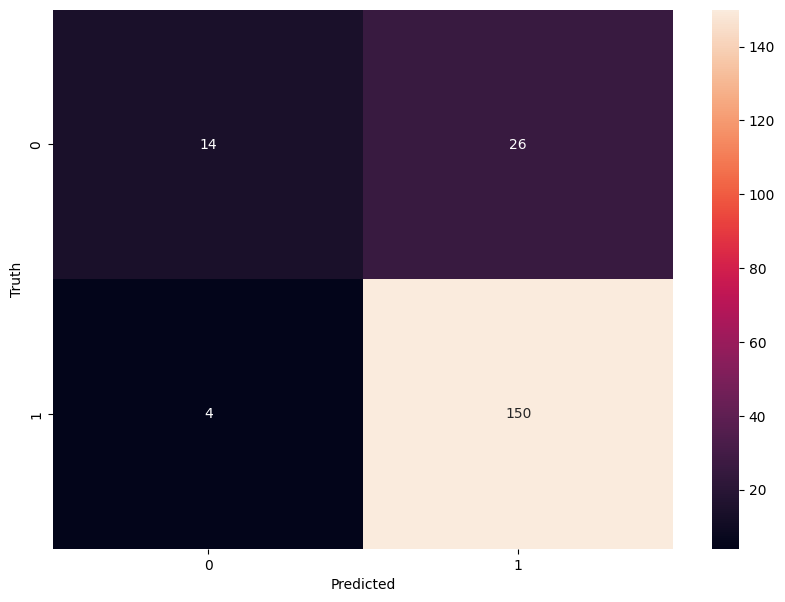

SVM Confusion Matrix:
 [[ 14  26]
 [  4 150]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.35      0.48        40
           1       0.85      0.97      0.91       154

    accuracy                           0.85       194
   macro avg       0.82      0.66      0.70       194
weighted avg       0.84      0.85      0.82       194

Random Forest Accuracy: 0.8041237113402062
Random Forest F1 Score: 0.653115000941088


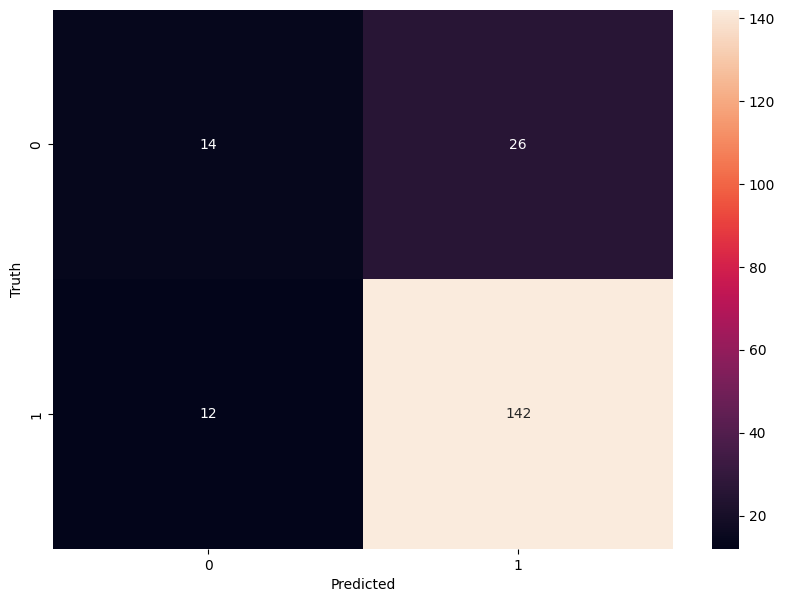

Random Forest Confusion Matrix:
 [[ 14  26]
 [ 12 142]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.35      0.42        40
           1       0.85      0.92      0.88       154

    accuracy                           0.80       194
   macro avg       0.69      0.64      0.65       194
weighted avg       0.78      0.80      0.79       194

Gradient Boosting Accuracy: 0.8092783505154639
Gradient Boosting F1 Score: 0.6581090735889498


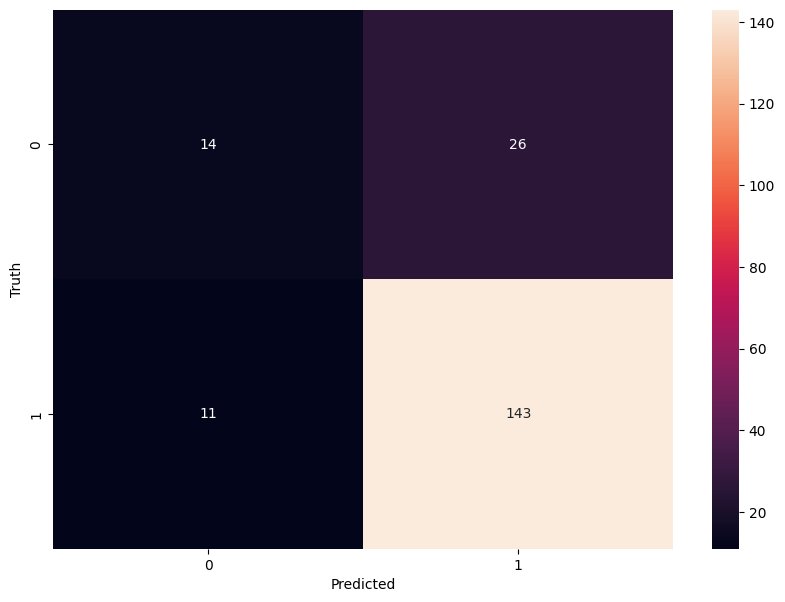

Gradient Boosting Confusion Matrix:
 [[ 14  26]
 [ 11 143]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.35      0.43        40
           1       0.85      0.93      0.89       154

    accuracy                           0.81       194
   macro avg       0.70      0.64      0.66       194
weighted avg       0.79      0.81      0.79       194

Decision Tree Accuracy: 0.7938144329896907
Decision Tree F1 Score: 0.6433823529411765


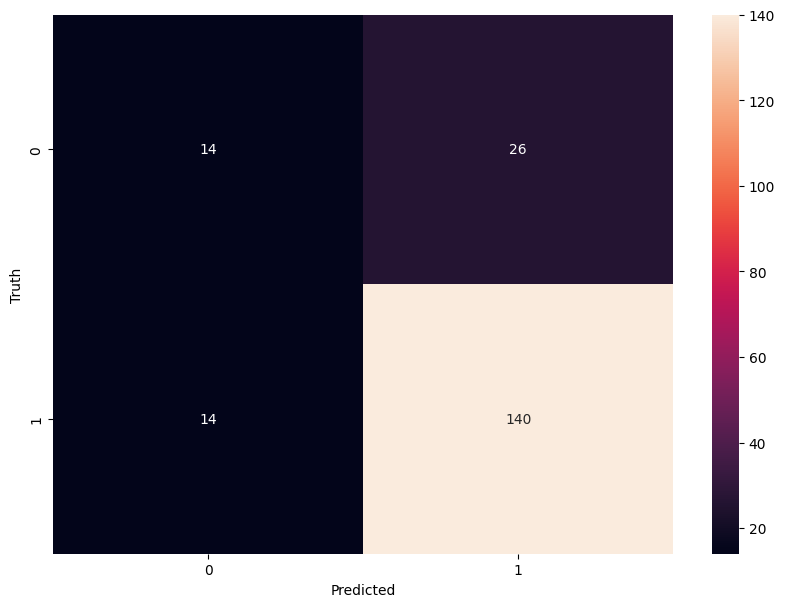

Decision Tree Confusion Matrix:
 [[ 14  26]
 [ 14 140]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.35      0.41        40
           1       0.84      0.91      0.88       154

    accuracy                           0.79       194
   macro avg       0.67      0.63      0.64       194
weighted avg       0.77      0.79      0.78       194

The best model is: SVM with an F1 score of 0.70


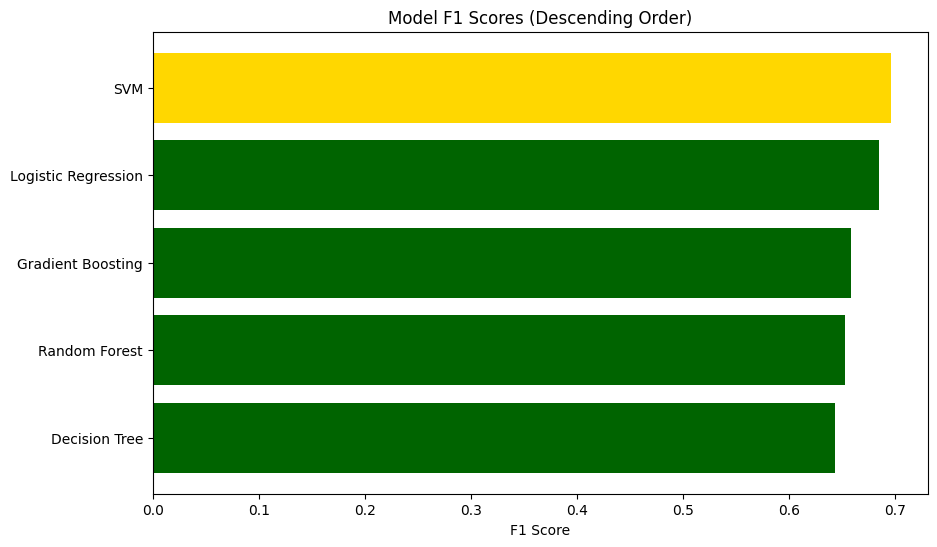

In [ ]:
#evaluate models after smote

build_and_evaluate_classifier_over(X_train_disassem_opt_resampled, X_test_disassem_opt,
                                                      y_train_disassem_opt_resampled, y_test['opt_level'])


Logistic Regression Accuracy: 0.8402061855670103
Logistic Regression F1 Score: 0.6379507555234483


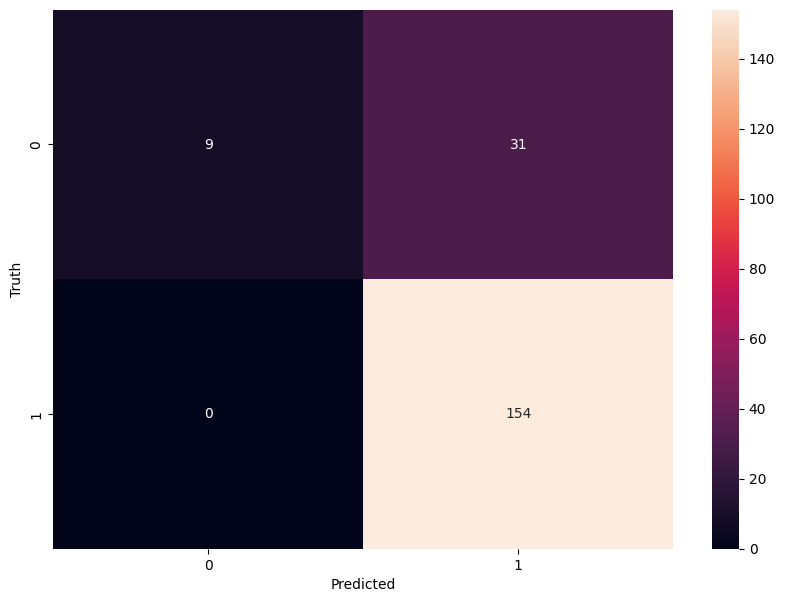

Logistic Regression Confusion Matrix:
 [[  9  31]
 [  0 154]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

SVM Accuracy: 0.8402061855670103
SVM F1 Score: 0.6379507555234483


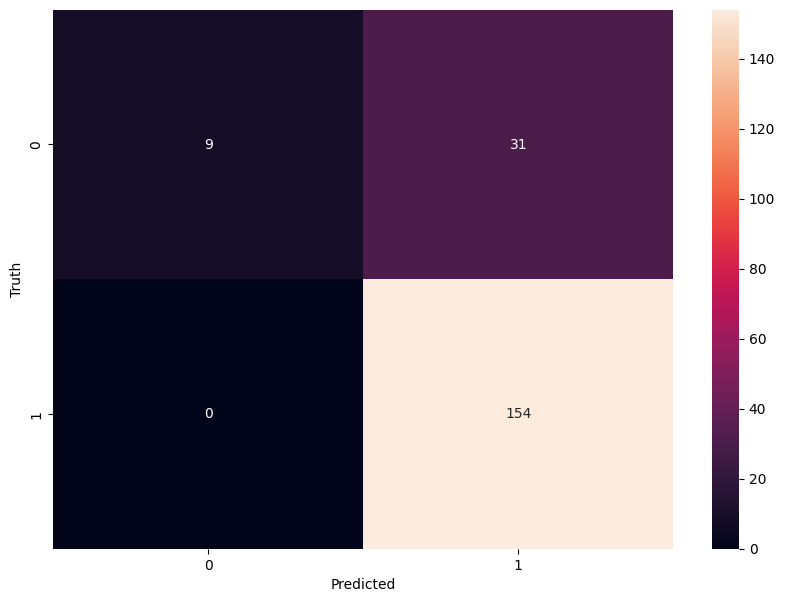

SVM Confusion Matrix:
 [[  9  31]
 [  0 154]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

Random Forest Accuracy: 0.8402061855670103
Random Forest F1 Score: 0.6379507555234483


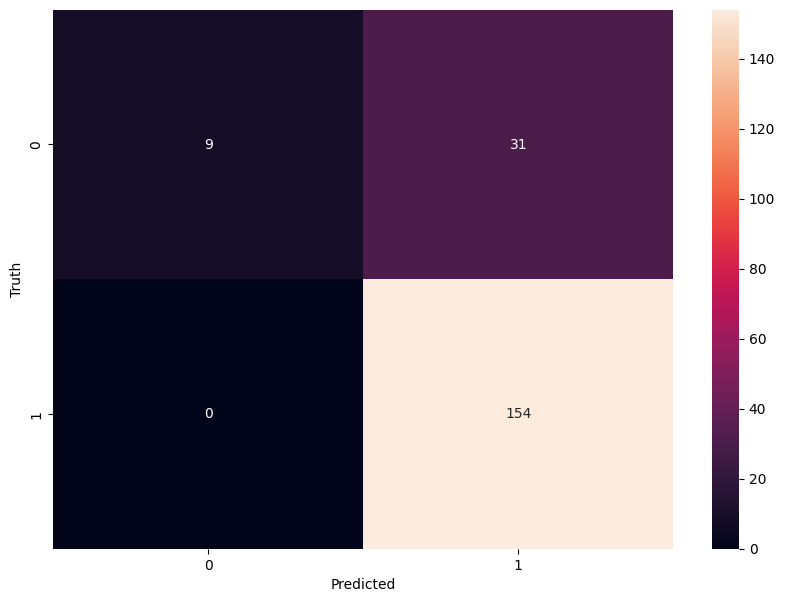

Random Forest Confusion Matrix:
 [[  9  31]
 [  0 154]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

Gradient Boosting Accuracy: 0.8402061855670103
Gradient Boosting F1 Score: 0.6379507555234483


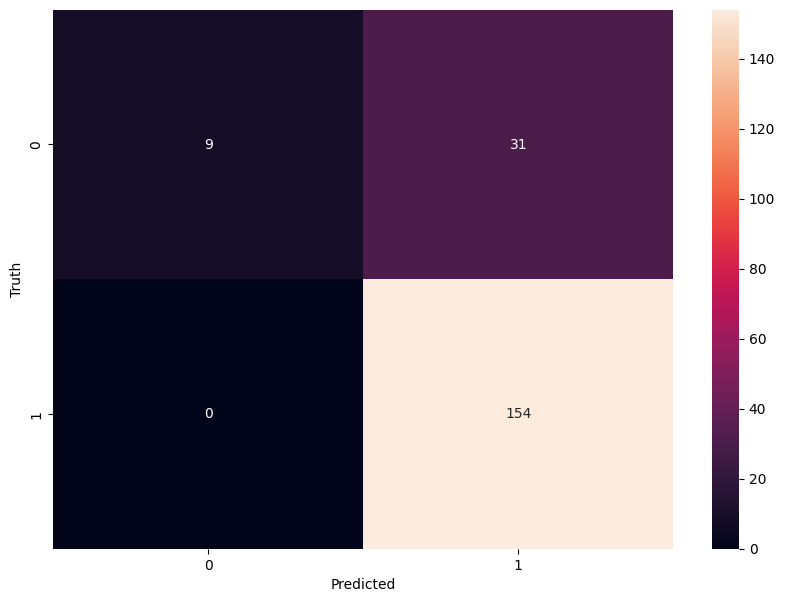

Gradient Boosting Confusion Matrix:
 [[  9  31]
 [  0 154]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

Decision Tree Accuracy: 0.8402061855670103
Decision Tree F1 Score: 0.6379507555234483


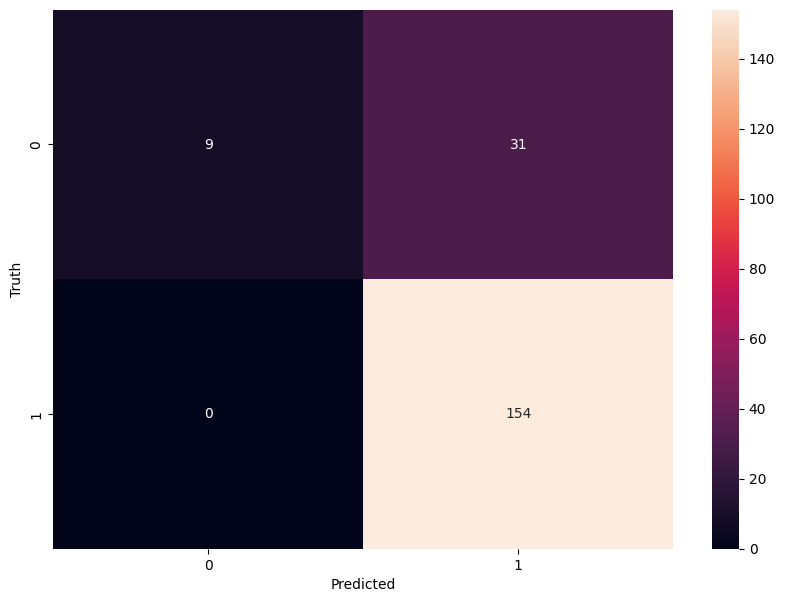

Decision Tree Confusion Matrix:
 [[  9  31]
 [  0 154]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194

The best model is: Logistic Regression with an F1 score of 0.64


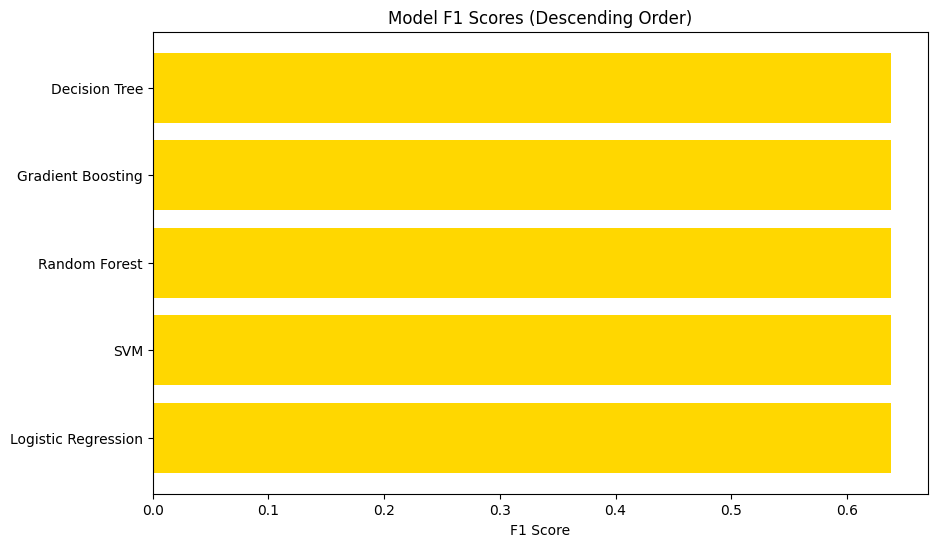

In [ ]:
build_and_evaluate_classifier_over(X_train_string_opt_resampled, X_test_strings_opt,
                                                    y_train_string_opt_resampled, y_test['opt_level'])


# Nerual Network

In [ ]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_metric(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def build_model(input_dim, num_classes):
    model = Sequential()

    # Input Layer
    model.add(Dense(256, input_dim=input_dim, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Hidden Layers
    model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer - Adapt to binary or multi-class based on num_classes
    if num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
        loss = 'binary_crossentropy'
    else:
        model.add(Dense(num_classes, activation='softmax'))
        loss = 'categorical_crossentropy'

    # Compile the model
    model.compile(optimizer=Adam(), loss=loss, metrics=[f1_metric])
    return model

In [ ]:
def build_and_evaluate_classifier_nn(X_train, X_test, y_train, y_test, vectorizer_max_features, selector_k_features, num_classes = 4):
    # Assuming build_vectorizer and transform_tfidf_vectors are defined elsewhere
    vectorizer = build_vectorizer(vectorizer_max_features, X_train, 'tfid')
    X_train_vect, X_test_vect = transform_tfidf_vectors(vectorizer, X_train, X_test)

    # Feature Selection
    selector = SelectKBest(f_classif, k=selector_k_features)
    X_train_selected = selector.fit_transform(X_train_vect, y_train)
    X_test_selected = selector.transform(X_test_vect)

    # Standardize Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    input_dim = X_train_scaled.shape[1]
    model = build_model(input_dim, num_classes)

    # Train Model and Capture History
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Training and Validation F1 Score
    plt.subplot(1, 2, 2)
    plt.plot(history.history['f1_metric'], label='Train F1 Score')
    plt.plot(history.history['val_f1_metric'], label='Validation F1 Score')
    plt.title('Training and Validation F1 Score')
    plt.legend()
    plt.show()

    # Evaluate Model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Adjust threshold as needed
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Neural Network - Accuracy: {accuracy}")
    print(f"Neural Network F1 Score:", f1)

    # Predictions for Confusion Matrix

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
def build_and_evaluate_classifier_nn_over(X_train, X_test, y_train, y_test, num_classes = 4):
    # Standardize Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    input_dim = X_train_scaled.shape[1]
    model = build_model(input_dim, num_classes)

    # Train Model and Capture History
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Training and Validation F1 Score
    plt.subplot(1, 2, 2)
    plt.plot(history.history['f1_metric'], label='Train F1 Score')
    plt.plot(history.history['val_f1_metric'], label='Validation F1 Score')
    plt.title('Training and Validation F1 Score')
    plt.legend()
    plt.show()

    # Evaluate Model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Adjust threshold as needed
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Neural Network - Accuracy: {accuracy}")
    print(f"Neural Network F1 Score:", f1)

    # Predictions for Confusion Matrix
    y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Adjust threshold as needed
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

## Optimization

### Disassembled

Epoch 1/50
22/22 [==============================] - 3s 20ms/step - loss: 0.9750 - f1_metric: 0.6901 - val_loss: 0.6357 - val_f1_metric: 0.9127
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.7529 - f1_metric: 0.7577 - val_loss: 0.5828 - val_f1_metric: 0.9127
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 0.7101 - f1_metric: 0.7968 - val_loss: 0.5556 - val_f1_metric: 0.9127
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6583 - f1_metric: 0.8244 - val_loss: 0.5343 - val_f1_metric: 0.9127
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6648 - f1_metric: 0.8605 - val_loss: 0.5313 - val_f1_metric: 0.9127
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6048 - f1_metric: 0.8644 - val_loss: 0.5200 - val_f1_metric: 0.9127
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.6381 - f1_metric: 0.8819 - val_loss: 0.5193 - val_f1_metric: 0.9127
Epoch

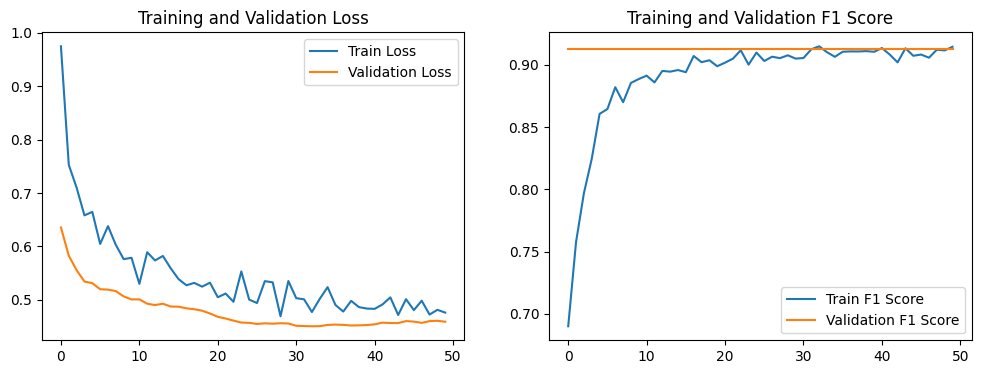

7/7 [==============================] - 1s 3ms/step
Neural Network - Accuracy: 0.9260427355766296
Neural Network F1 Score: 0.6891025641025641


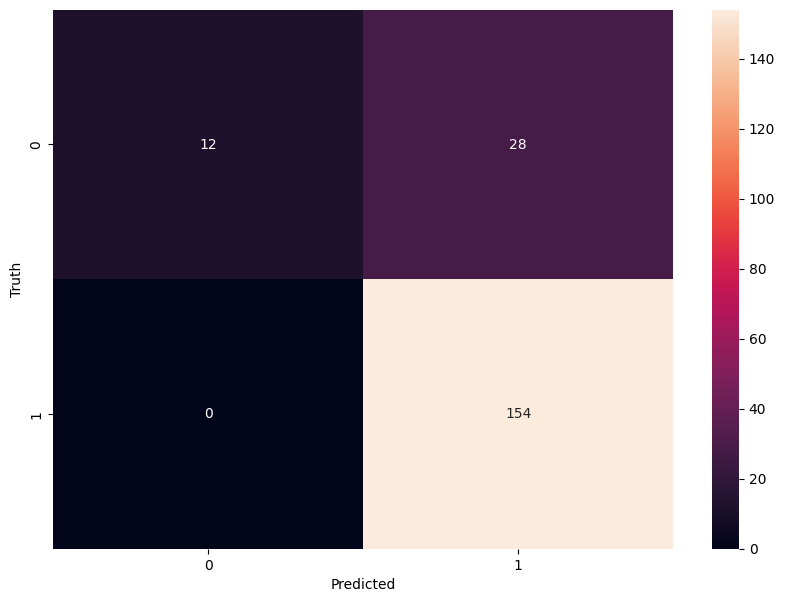

Confusion Matrix:
 [[ 12  28]
 [  0 154]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46        40
           1       0.85      1.00      0.92       154

    accuracy                           0.86       194
   macro avg       0.92      0.65      0.69       194
weighted avg       0.88      0.86      0.82       194



In [ ]:
# Build and evaluate classifier for disassembled code
build_and_evaluate_classifier_nn(X_train['disassembled'], X_test['disassembled'],
                                                      y_train['opt_level'], y_test['opt_level'],
                                                      vectorizer_max_features=500, selector_k_features=4, num_classes = 2)

### Strings

Epoch 1/50
22/22 [==============================] - 3s 27ms/step - loss: 0.8678 - f1_metric: 0.6900 - val_loss: 0.6116 - val_f1_metric: 0.8938
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.7117 - f1_metric: 0.7817 - val_loss: 0.5431 - val_f1_metric: 0.8938
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.6922 - f1_metric: 0.8121 - val_loss: 0.5142 - val_f1_metric: 0.8938
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6858 - f1_metric: 0.8227 - val_loss: 0.5041 - val_f1_metric: 0.8938
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.6492 - f1_metric: 0.8529 - val_loss: 0.5005 - val_f1_metric: 0.8938
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.6228 - f1_metric: 0.8466 - val_loss: 0.4995 - val_f1_metric: 0.8938
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.5793 - f1_metric: 0.8678 - val_loss: 0.5001 - val_f1_metric: 0.8938
Epoch

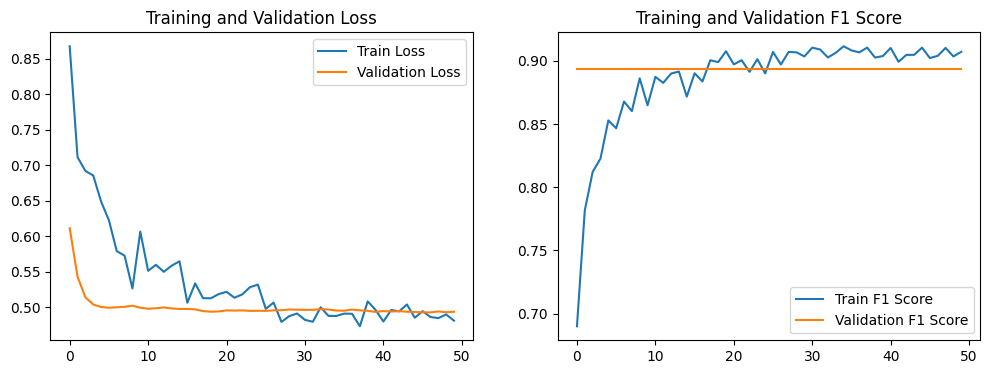

7/7 [==============================] - 0s 2ms/step
Neural Network - Accuracy: 0.9187828898429871
Neural Network F1 Score: 0.6379507555234483


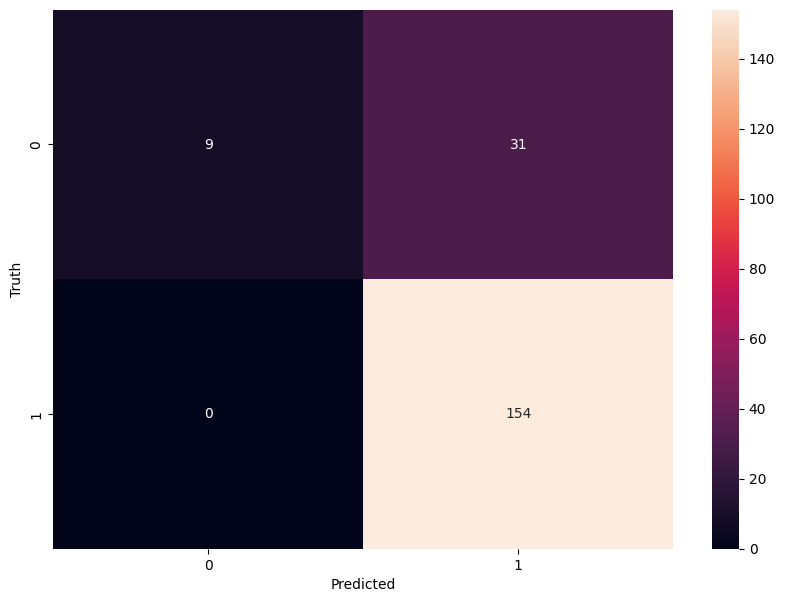

Confusion Matrix:
 [[  9  31]
 [  0 154]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194



In [ ]:
# Build and evaluate classifier for string features
build_and_evaluate_classifier_nn(X_train['string'], X_test['string'],
                                                    y_train['opt_level'], y_test['opt_level'],
                                                    vectorizer_max_features=20000, selector_k_features=2, num_classes = 2)

## Optimization Smote

### Disassembled

Epoch 1/50
35/35 [==============================] - 3s 20ms/step - loss: 0.7922 - f1_metric: 0.6650 - val_loss: 0.7766 - val_f1_metric: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.7225 - f1_metric: 0.6948 - val_loss: 0.8102 - val_f1_metric: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.7024 - f1_metric: 0.6980 - val_loss: 0.8225 - val_f1_metric: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6900 - f1_metric: 0.7074 - val_loss: 0.8341 - val_f1_metric: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6937 - f1_metric: 0.7246 - val_loss: 0.8216 - val_f1_metric: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6779 - f1_metric: 0.7304 - val_loss: 0.7915 - val_f1_metric: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6599 - f1_metric: 0.7275 - val_loss: 0.8054 - val

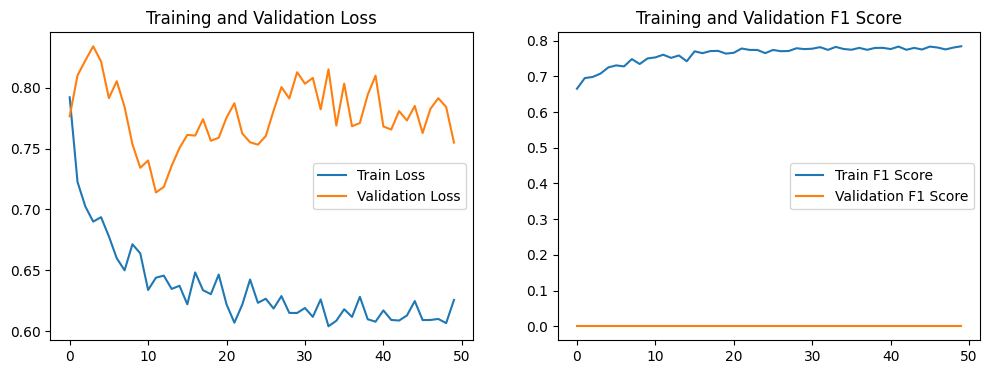

7/7 [==============================] - 0s 3ms/step
Neural Network - Accuracy: 0.9281625151634216
Neural Network F1 Score: 0.7140049140049141
7/7 [==============================] - 0s 2ms/step


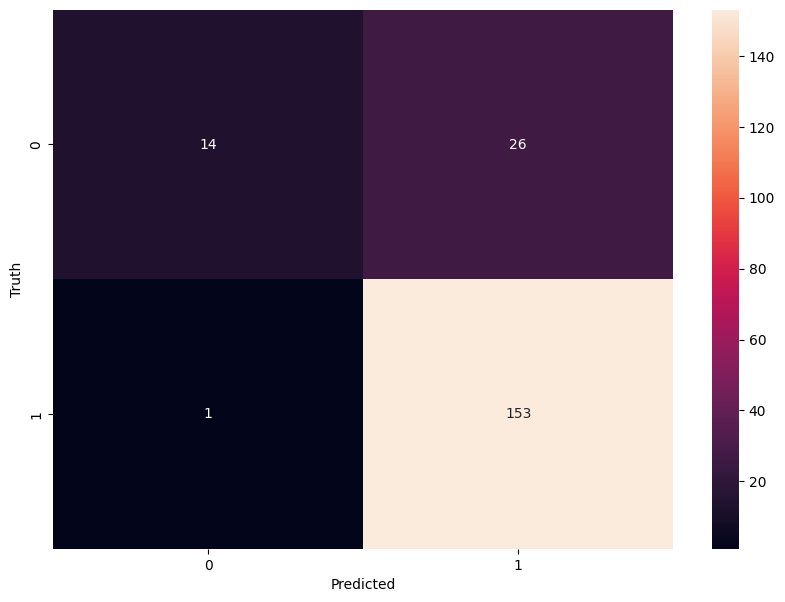

Confusion Matrix:
 [[ 14  26]
 [  1 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.35      0.51        40
           1       0.85      0.99      0.92       154

    accuracy                           0.86       194
   macro avg       0.89      0.67      0.71       194
weighted avg       0.87      0.86      0.83       194



In [ ]:
#evaluate models after smote

build_and_evaluate_classifier_nn_over(X_train_disassem_opt_resampled, X_test_disassem_opt,
                                                      y_train_disassem_opt_resampled, y_test['opt_level'], 2)

### Strings

Epoch 1/50
35/35 [==============================] - 3s 13ms/step - loss: 0.9441 - f1_metric: 0.5653 - val_loss: 0.7902 - val_f1_metric: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.8136 - f1_metric: 0.6689 - val_loss: 0.7693 - val_f1_metric: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7605 - f1_metric: 0.6818 - val_loss: 0.6988 - val_f1_metric: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7620 - f1_metric: 0.6461 - val_loss: 0.6524 - val_f1_metric: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7384 - f1_metric: 0.6776 - val_loss: 0.7073 - val_f1_metric: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7313 - f1_metric: 0.6786 - val_loss: 0.6999 - val_f1_metric: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7094 - f1_metric: 0.6854 - val_loss: 0.7360 - val

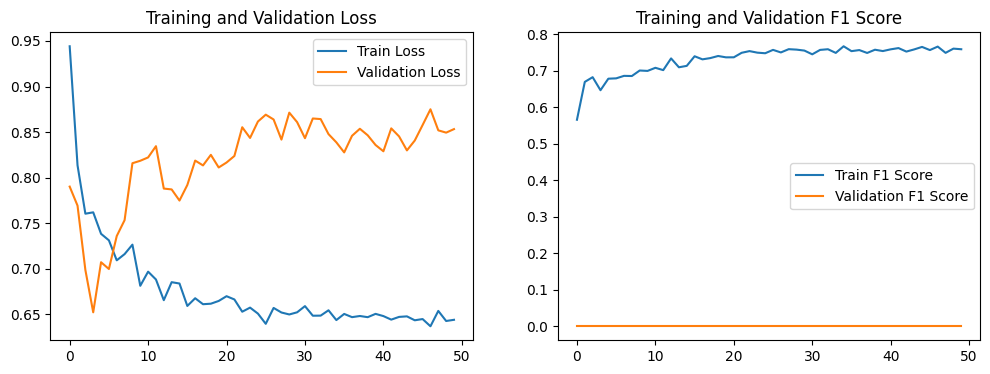

7/7 [==============================] - 0s 2ms/step
Neural Network - Accuracy: 0.9187828898429871
Neural Network F1 Score: 0.6379507555234483
7/7 [==============================] - 0s 2ms/step


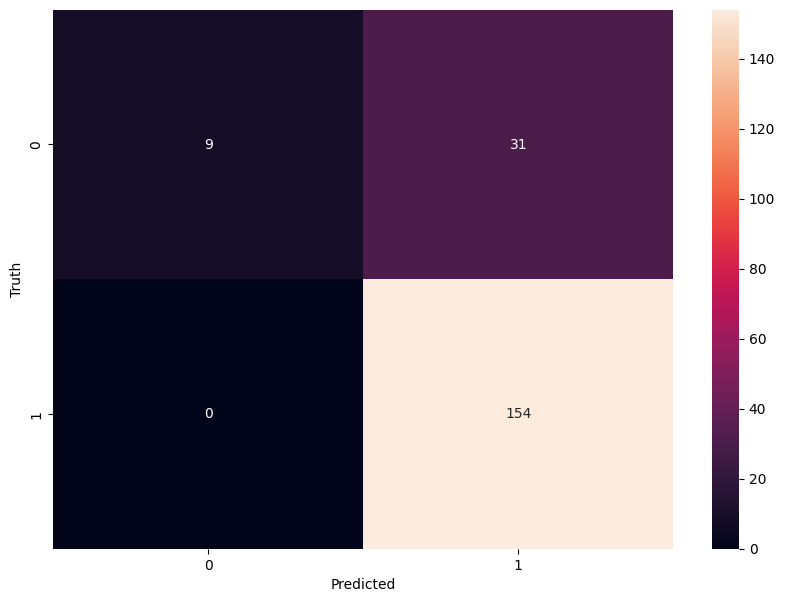

Confusion Matrix:
 [[  9  31]
 [  0 154]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.83      1.00      0.91       154

    accuracy                           0.84       194
   macro avg       0.92      0.61      0.64       194
weighted avg       0.87      0.84      0.80       194



In [ ]:
build_and_evaluate_classifier_nn_over(X_train_string_opt_resampled, X_test_strings_opt,
                                                    y_train_string_opt_resampled, y_test['opt_level'], 2)